# Lending Club Case Study
## by Ankit Kumar Surana

## Introduction
As a worker of a consumer finance company that specialises in lending different kinds of loans to urban clients, part of my job is to facilitate loan approval decision-making by evaluating application profiles and identifying hazards related to loan payback potential. To do this, I would need to analyze data in "loan.csv", which contains historical information about past loan applicants with default status information. This means finding patterns that indicate the applicant is likely to default, which in turn enables taking further action, such as denying a loan, adjusting the loan amount, or applying higher interest rates to risky applicants.

Through the analysis, I aim to understand consumer and loan attributes affecting the customer's tendency to default, and also to find the driving factors, or variables, behind loan defaults. The company can then use such knowledge to improve its portfolio and risk assessment strategies.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

pd.set_option('max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


# Gathering

In [2]:
df = pd.read_csv('loan.csv')

In [3]:
# high-level overview of data shape and composition
print(df.shape)

(39717, 111)


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [5]:
df.head()

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade                 emp_title emp_length  \
0   10.65%       162.87     B        B2                       NaN  10+ years   
1   15.27%        59.83     C        C4                     Ryder   < 1 year   
2   15.96%        84.33     C        C5                       NaN  10+ years   
3   13.49%       339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%        67.79     B        B5  University Medical Group     1 year   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT     24000.0            Verified  Dec-11   Fully Paid   
1           RENT     30000.0     Source Verified  Dec-11  Charged Off   
2           RENT     12252.0        Not Verified  Dec-11   Fully Paid   
3           RENT     49200.0     Source Verified  Dec-11   Fully Paid   
4           RENT     80000.0     Source Verified  Dec-11      Current   

  pymnt_plan  \
0          n   
1          n   
2          n   
3          n   
4          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   
3  https://lendingclub.com/browse/loanDetail.action?loan_id=1076863   
4  https://lendingclub.com/browse/loanDetail.action?loan_id=1075358   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                               

In [6]:
# Data Dictionary
data_dictionary = pd.read_excel('Data_Dictionary.xlsx')
data_dictionary = data_dictionary.dropna(axis=0, how="any")
data_dictionary.shape

(115, 2)

# Assessing

In [7]:
# Check duplicated value
df.duplicated().sum()

0

In [8]:
# Check null value for each column
null_cols = df.columns[df.isnull().all(axis=0)].tolist()

print(f"List of columns with NULL's : \n\n {null_cols} \n")
print(f"Count of columns having all NULL values : {len(null_cols)}")

List of columns with NULL's : 

 ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_

In [9]:
# Find the uniqueness of a column in data frame

uniq_list = df.columns[(df.nunique() == 1)].tolist()
print("\nList of columns that have same value for all records : ", uniq_list )


List of columns that have same value for all records :  ['pymnt_plan', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens']


In [10]:
# Find columns that have Categorical variables in the dataset

# Function that lists the categorical_values in a column
def categorical_values(column_list):
    for column in column_list:
         print(f"<<<<< {column} >>>>> \n")
         print(df[column].value_counts(), "\n")

column_list = ['term', 'grade', 'sub_grade', 'verification_status', 'loan_status', 'purpose', "home_ownership"]
categorical_values(column_list)

<<<<< term >>>>> 

term
 36 months    29096
 60 months    10621
Name: count, dtype: int64 

<<<<< grade >>>>> 

grade
B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: count, dtype: int64 

<<<<< sub_grade >>>>> 

sub_grade
B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: count, dtype: int64 

<<<<< verification_status >>>>> 

verification_status
Not Verified       16921
Verified           12809
Source Verified     9987
Name: count, dtype: int64 

<<<<< loan_status >>>>> 

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64 

<<<<< purpose >>>>> 

purpose
debt_consolida

>1) Columns used post-loan approval need to be dropped.
>2) Some rows have loan_status as "Current".
>3) Some columns have all NULL values.
>4) Some columns are textual and masked and do not aid in the analysis.
>5) Some columns have the same values across all rows of the dataset.
>6) For the columns where the data has a % symbol in it, clean the data.
>7) Removing the alphabet from the sub-grade.
>8) The values in the emp_length need to be cleaned.
>9) Round off the amount values to the nearest 2 digits.
>10) Some columns with date values are of object data type.
>11) Convert the data type to float after cleaning the data with % in them.
>12) Convert the data type to categorical for columns that have categorical values.
>13) Break down the date columns to smaller metrics like month, and year.
>14) Deriving a categorical column form loan_amnt.
>15) Handle the missing values: imputing/ deleting.
>16) Renaming the columns : Abbrevations etc.
>17) Treating the outliers.

# Cleaning

In [11]:
df_clean = df.copy()

In [12]:
df_clean.shape

(39717, 111)

##### Define

> 1) Dropping columns used post-loan approval that would not aid in analysis.

##### Code

In [13]:
# Columns in data_dictionary not available in the data
data_dictionary[data_dictionary.LoanStatNew.isin(df.columns.tolist()) == False]

LoanStatNew  \
21         fico_range_high   
22          fico_range_low   
37    last_fico_range_high   
38     last_fico_range_low   
110     total_rev_hi_lim     
113  verified_status_joint   

                                                                                                            Description  
21                                         The upper boundary range the borrower’s FICO at loan origination belongs to.  
22                                         The lower boundary range the borrower’s FICO at loan origination belongs to.  
37                                                 The upper boundary range the borrower’s last FICO pulled belongs to.  
38                                                 The lower boundary range the borrower’s last FICO pulled belongs to.  
110                                                                            Total revolving high credit/credit limit  
113  Indicates if the co-borrowers' joint income was verified by LC, not verified, or if the income source was verified

In [14]:
# Updating the data_dictionary
data_dictionary = data_dictionary[~data_dictionary.LoanStatNew.isin(df.columns.tolist()) == False]

In [15]:
# data_dictionary

In [16]:
post_loan_cols = ['earliest_cr_line', 'collection_recovery_fee' , 'last_credit_pull_d',
 'delinq_2yrs', 'inq_last_6mths', 'last_pymnt_amnt', 'last_pymnt_d', 
 'open_acc', 'pub_rec', 'recoveries', 'revol_bal', 'revol_util', 
 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
 'total_rec_late_fee' ]

# Updating the data_dictionary of useful columns
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(post_loan_cols) == False].reset_index(drop=True)

#Dropping columns used post-loan approval
df_clean = df_clean.drop(post_loan_cols, axis=1)

##### Test

In [17]:
# Validating df_clean for post-approval columns
df_clean.columns[df_clean.columns.isin(post_loan_cols) == True]

Index([], dtype='object')

##### Define

>2) Dropping rows that have loan_status as "Current".
>3) Dropping the columns having all NULL values.
>4) Dropping additional columns that do not aid in analysis : ''id', 'member_id', 'url', 'title', 'emp_title',  'desc', 'zip_code'
>5) Dropping the columns that have same values in all rows of the dataset.

##### Code

In [18]:
# Dropping rows that have loan_status as "Current".
df_clean = df_clean[df_clean['loan_status']!='Current']

In [19]:
# Excluding columns available in the data whose all the values are null
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(df_clean.columns[df_clean.isna().all()].tolist()) == False].reset_index(drop=True)

# Dropping all the columns having NULL values
df_clean = df_clean.dropna(axis = 1, how = 'all')

In [20]:
# Dropping any additional columns that do not aid in analysis.
col_drop = ['id', 'member_id', 'url', 'title', 'emp_title', 'desc', 'zip_code']

#Update the data_dictionary by removing the col_drop
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(col_drop) == False].reset_index(drop=True)

df_clean = df_clean.drop(col_drop, axis=1)

In [21]:
# Dropping all the columns that have same values in all the rows of the dataset.
uniq_val_cols = df_clean.columns[(df_clean.nunique() == 1)].tolist()

#Update the data_dictionary by removing the uniq_val_cols 
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(uniq_val_cols) == False].reset_index(drop=True)

df_clean = df_clean.drop(uniq_val_cols, axis=1)

##### Test

In [22]:
# Validating if there are any rows that have loan_status as "Current".
df_clean[df_clean['loan_status']=='Current']

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, addr_state, dti, mths_since_last_delinq, mths_since_last_record, pub_rec_bankruptcies]
Index: []

In [23]:
# Validating if there is any column that has all NULL values
df_clean.columns[df_clean.isnull().all(axis=0)].tolist()

[]

In [24]:
# Validating if there are columns that have same values for all rows in the dataset.
df_clean.columns[(df_clean.nunique() == 1)].tolist()

[]

##### Define

>6) Removing the % symbol from the "int_rate" column.
>7) Removing the alphabet from the sub-grade.
>8) Cleaning the values in "emp_length" column by removing the "years" from the data and converting "10+" to 10 and "< 1" to 0.
>9) Round off the amount to nearest 2 digits.

##### Code

In [25]:
# Removing the % symbol from the int_rate column.

df_clean['int_rate'] = df_clean['int_rate'].str.split("%").str[0]

In [26]:
# Removing the alphabet from the sub_grade.
df_clean['sub_grade'] = df_clean['sub_grade'].str[1]

In [27]:
# Cleaning the values in "emp_length" column by removing the "years" from the data and converting "10+" to 10 and "< 1" to 0.

df_clean.emp_length = df_clean.emp_length.str.split("year").str[0]
df_clean.emp_length = df_clean.emp_length.str.replace("+","").str.replace("< 1","0")

In [28]:
# Round off the amounts to nearest 2 digits

rnd_cols = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','annual_inc']

# Converting all the columns to float and then rounding to 2 digits
df_clean[rnd_cols] = df_clean[rnd_cols].astype("float").round(5)

##### Test

In [29]:
# Validating the int_rate column.
df_clean.int_rate.describe()

count     38577
unique      370
top       10.99
freq        913
Name: int_rate, dtype: object

In [30]:
# Validating the emp_length column.
df_clean.emp_length.value_counts()

emp_length
10     8488
0      4508
2      4291
3      4012
4      3342
5      3194
1      3169
6      2168
7      1711
8      1435
9      1226
Name: count, dtype: int64

In [31]:
# Validating the amount and rate columns data type.
print(df_clean.info())

df_clean.head()


<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  float64
 1   funded_amnt             38577 non-null  float64
 2   funded_amnt_inv         38577 non-null  float64
 3   term                    38577 non-null  object 
 4   int_rate                38577 non-null  object 
 5   installment             38577 non-null  float64
 6   grade                   38577 non-null  object 
 7   sub_grade               38577 non-null  object 
 8   emp_length              37544 non-null  object 
 9   home_ownership          38577 non-null  object 
 10  annual_inc              38577 non-null  float64
 11  verification_status     38577 non-null  object 
 12  issue_d                 38577 non-null  object 
 13  loan_status             38577 non-null  object 
 14  purpose                 38577 non-null  obj

loan_amnt  funded_amnt  funded_amnt_inv        term int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months    10.65       162.87   
1     2500.0       2500.0           2500.0   60 months    15.27        59.83   
2     2400.0       2400.0           2400.0   36 months    15.96        84.33   
3    10000.0      10000.0          10000.0   36 months    13.49       339.31   
5     5000.0       5000.0           5000.0   36 months     7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B         2        10            RENT     24000.0            Verified   
1     C         4         0            RENT     30000.0     Source Verified   
2     C         5        10            RENT     12252.0        Not Verified   
3     C         1        10            RENT     49200.0     Source Verified   
5     A         4         3            RENT     36000.0     Source Verified   

  issue_d  loan_status         purpose addr_state    dti  \
0  Dec-11   Fully Paid     credit_card         AZ  27.65   
1  Dec-11  Charged Off             car         GA   1.00   
2  Dec-11   Fully Paid  small_business         IL   8.72   
3  Dec-11   Fully Paid           other         CA  20.00   
5  Dec-11   Fully Paid         wedding         AZ  11.20   

   mths_since_last_delinq  mths_since_last_record  pub_rec_bankruptcies  
0                     NaN                     NaN                   0.0  
1                     NaN                     NaN                   0.0  
2                     NaN                     NaN                   0.0  
3                    35.0                     NaN                   0.0  
5                     NaN                     NaN                   0.0

> 10) Converting the data type of date columns from object to datetime.
> 11) Converting the data type of rate columns to float : 'int_rate'
> 12) Convert the data type to categorical for columns that have categorical values.

##### Code

In [32]:
# Converting to date type
for col in df_clean.columns.to_list():
    if re.match('(.*_d$|.*cr_line$)', col):
        df_clean[col] = pd.to_datetime(df_clean[col],format="%b-%y")

In [33]:
# Converting to float type
df_clean['int_rate'] = df_clean['int_rate'].astype("float")

In [34]:
# Converting to Categories
columns = ['emp_length', 'home_ownership', 'grade', 'sub_grade', 'loan_status', 'term', 'verification_status']
df_clean[columns] = df_clean[columns].astype("category")

##### Test

In [35]:
# Validating data types of date and rate columns
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               38577 non-null  float64       
 1   funded_amnt             38577 non-null  float64       
 2   funded_amnt_inv         38577 non-null  float64       
 3   term                    38577 non-null  category      
 4   int_rate                38577 non-null  float64       
 5   installment             38577 non-null  float64       
 6   grade                   38577 non-null  category      
 7   sub_grade               38577 non-null  category      
 8   emp_length              37544 non-null  category      
 9   home_ownership          38577 non-null  category      
 10  annual_inc              38577 non-null  float64       
 11  verification_status     38577 non-null  category      
 12  issue_d                 38577 non-null  datetime64[

##### Define

> 13)  Breakdown the date column into smaller metrics like : years and months
> 14) Deriving a categorical column loan_amnt_b from loan_amnt

##### Code

In [36]:
#Breaking down the date column into smaller metrics like : years and months

df_clean['issue_d_year'] = df_clean['issue_d'].dt.year
df_clean['issue_d_month'] = df_clean['issue_d'].dt.month_name()
# df_clean.drop('issue_d', axis=1, inplace=True)

# Converting the data type to categorical
issue_d_month_range = df_clean.issue_d_month.unique().tolist()
issue_d_month_range.reverse()
df_clean['issue_d_month'] = pd.Categorical(df_clean['issue_d_month'], issue_d_month_range)

In [37]:
# Deriving categorical column loan_amount_b from loan amount
bins = [bin for bin in range(0,35000,5000)]
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins)-1)]
df_clean['loan_amnt_b'] = pd.cut(df_clean['loan_amnt'], bins=bins, labels=labels)

##### Test

In [38]:
#Validating the smaller metrics like : years and months of a date column
df_clean[['issue_d_year','issue_d_month']].head()

issue_d_year issue_d_month
0          2011      December
1          2011      December
2          2011      December
3          2011      December
5          2011      December

In [39]:
# Validating categorical column loan_amount_b derived from loan amount
df_clean['loan_amnt_b'].head()

0        0-5000
1        0-5000
2        0-5000
3    5000-10000
5        0-5000
Name: loan_amnt_b, dtype: category
Categories (6, object): ['0-5000' < '5000-10000' < '10000-15000' < '15000-20000' < '20000-25000' < '25000-30000']

##### Define

> 15) Handle the missing values: imputing/ deleting.

##### Code

In [40]:
# Columns having NULL/NaN values 
round(df_clean.isnull().sum().sort_values(ascending=False)/len(df)*100,2)

mths_since_last_record    90.23
mths_since_last_delinq    62.71
emp_length                 2.60
loan_amnt_b                1.85
pub_rec_bankruptcies       1.75
issue_d                    0.00
issue_d_month              0.00
issue_d_year               0.00
dti                        0.00
addr_state                 0.00
purpose                    0.00
loan_status                0.00
loan_amnt                  0.00
funded_amnt                0.00
annual_inc                 0.00
home_ownership             0.00
sub_grade                  0.00
grade                      0.00
installment                0.00
int_rate                   0.00
term                       0.00
funded_amnt_inv            0.00
verification_status        0.00
dtype: float64

In [41]:
# Columns mths_since_last_record and mths_since_last_delinq can be dropped as more than 60% of the data is NULL/ NaN
drop_cols = ['mths_since_last_record','mths_since_last_delinq']
df_clean = df_clean.drop(drop_cols, axis=1)

#Update the data_dictionary by removing the drop_cols 
data_dictionary = data_dictionary[data_dictionary.LoanStatNew.isin(drop_cols) == False].reset_index(drop=True)

In [42]:
# Handling missing values for emp_length
print(round(df_clean.emp_length.value_counts()/len(df)*100,2))

mode_value = df_clean.emp_length.mode()[0]
print("\nMode value for emp_length : ", mode_value)

# Imputing the NULL/ NaN values with mode value for emp_length
df_clean.emp_length.fillna(mode_value, inplace=True)

emp_length
10     21.37
0      11.35
2      10.80
3      10.10
4       8.41
5       8.04
1       7.98
6       5.46
7       4.31
8       3.61
9       3.09
Name: count, dtype: float64

Mode value for emp_length :  10 


In [43]:
# Handling missing values for pub_rec_bankruptcies
print(round(df_clean.pub_rec_bankruptcies.value_counts()/len(df)*100,2))

mode_value = df_clean.pub_rec_bankruptcies.mode()[0]
print("\nMode value for pub_rec_bankruptcies : ", mode_value)

#More than 90% of the records have pub_rec_bankruptcies as 0.0. Hence imputing the value with 0.0
df_clean.pub_rec_bankruptcies.fillna(mode_value, inplace=True)

pub_rec_bankruptcies
0.0    91.24
1.0     4.12
2.0     0.01
Name: count, dtype: float64

Mode value for pub_rec_bankruptcies :  0.0


##### Test

In [44]:
# Validating the handling of missing values
df_clean.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
addr_state                0
dti                       0
pub_rec_bankruptcies      0
issue_d_year              0
issue_d_month             0
loan_amnt_b             735
dtype: int64

In [45]:
df_clean.head()

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  installment  \
0     5000.0       5000.0           4975.0   36 months     10.65       162.87   
1     2500.0       2500.0           2500.0   60 months     15.27        59.83   
2     2400.0       2400.0           2400.0   36 months     15.96        84.33   
3    10000.0      10000.0          10000.0   36 months     13.49       339.31   
5     5000.0       5000.0           5000.0   36 months      7.90       156.46   

  grade sub_grade emp_length home_ownership  annual_inc verification_status  \
0     B         2        10            RENT     24000.0            Verified   
1     C         4         0            RENT     30000.0     Source Verified   
2     C         5        10            RENT     12252.0        Not Verified   
3     C         1        10            RENT     49200.0     Source Verified   
5     A         4         3            RENT     36000.0     Source Verified   

     issue_d  loan_status         purpose addr_state    dti  \
0 2011-12-01   Fully Paid     credit_card         AZ  27.65   
1 2011-12-01  Charged Off             car         GA   1.00   
2 2011-12-01   Fully Paid  small_business         IL   8.72   
3 2011-12-01   Fully Paid           other         CA  20.00   
5 2011-12-01   Fully Paid         wedding         AZ  11.20   

   pub_rec_bankruptcies  issue_d_year issue_d_month loan_amnt_b  
0                   0.0          2011      December      0-5000  
1                   0.0          2011      December      0-5000  
2                   0.0          2011      December      0-5000  
3                   0.0          2011      December  5000-10000  
5                   0.0          2011      December      0-5000

In [46]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   funded_amnt           38577 non-null  float64       
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  category      
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  category      
 7   sub_grade             38577 non-null  category      
 8   emp_length            38577 non-null  category      
 9   home_ownership        38577 non-null  category      
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  category      
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

In [47]:
data_dictionary

LoanStatNew  \
0             addr_state   
1             annual_inc   
2                    dti   
3             emp_length   
4            funded_amnt   
5        funded_amnt_inv   
6                  grade   
7         home_ownership   
8            installment   
9               int_rate   
10               issue_d   
11             loan_amnt   
12           loan_status   
13  pub_rec_bankruptcies   
14               purpose   
15             sub_grade   
16                  term   
17   verification_status   

                                                                                                                                                                                                 Description  
0                                                                                                                                                 The state provided by the borrower in the loan application  
1                                                                                                                              The self-reported annual income provided by the borrower during registration.  
2   A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  
3                                                                         Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   
4                                                                                                                                             The total amount committed to that loan at that point in time.  
5                                                                                                                               The total amount committed by investors for that loan at that point in time.  
6                                                                                                                                                                                     LC assigned loan grade  
7                                                                                        The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
8                                                                                                                                           The monthly payment owed by the borrower if the loan originates.  
9                                                                                                                                                                                  Interest Rate on the loan  
10                                                                                                                                                                       The month which the loan was funded  
11                              The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
12                                                                                                                                                                                Current status of the loan  
13                                                                                                                                                                      Number of public record bankruptcies  
14                                                                                                                                                A category provided by the borrower for the loan request.   
15                                                                                                                                                                      

##### Define

> 16) Renaming the abbrevated column : dti

##### Code

In [48]:
# Renaming the dti to debt_to_income
new_mapping = {'dti': 'debt_to_income'}
                        
df_clean = df_clean.rename(columns=new_mapping)

##### Test

In [49]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  float64       
 1   funded_amnt           38577 non-null  float64       
 2   funded_amnt_inv       38577 non-null  float64       
 3   term                  38577 non-null  category      
 4   int_rate              38577 non-null  float64       
 5   installment           38577 non-null  float64       
 6   grade                 38577 non-null  category      
 7   sub_grade             38577 non-null  category      
 8   emp_length            38577 non-null  category      
 9   home_ownership        38577 non-null  category      
 10  annual_inc            38577 non-null  float64       
 11  verification_status   38577 non-null  category      
 12  issue_d               38577 non-null  datetime64[ns]
 13  loan_status          

##### Define

> 17) Indetifying and Handling the outliers/extreme values.

##### Code

In [50]:
# Treating outliers

def outlier_plot(dataframe, column_list): 
    """
    Plots boxplots to examine outliers in the specified columns of the given dataframe.

    Parameters:
    dataframe (DataFrame): The pandas DataFrame containing the data.
    column_list (list): A list of column names to examine for outliers.

    Returns:
    None
    """
    for index, value in enumerate(column_list): 
        title_name = f"Outlier Examination for {value} column"    
        plt.subplot(2, 3, index+1)
        plt.subplots_adjust(hspace = .4, wspace = .4)
        plt.title(title_name, fontsize=7)  
        dataframe[value].plot(figsize=(16,8), kind='box')

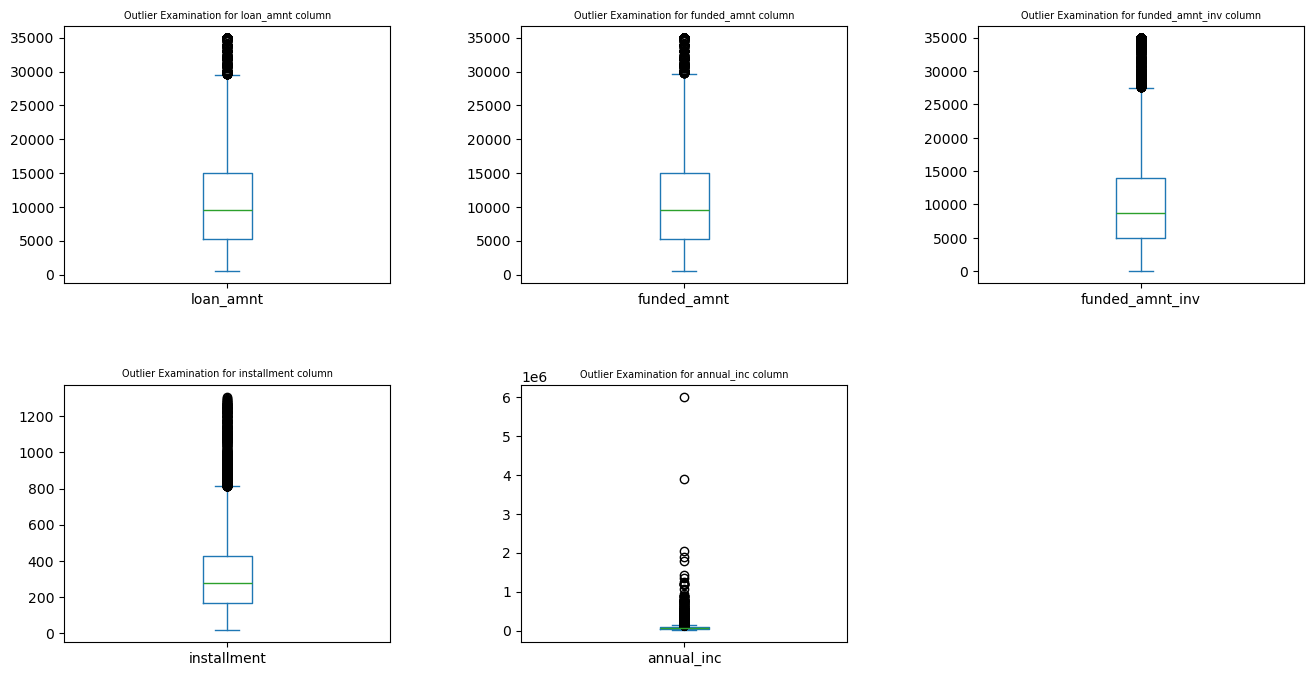

<Figure size 640x480 with 0 Axes>

In [51]:
cols = ['loan_amnt', 'funded_amnt','funded_amnt_inv','installment','annual_inc']
outlier_plot(df_clean, cols)
plt.show()
plt.tight_layout()

In [52]:
# Setting the upper quartile to 80% as most outliers lay outside the 80% range. 
Q1 = df_clean[cols].quantile(0.05)
Q3 = df_clean[cols].quantile(0.80)
IQR = Q3 - Q1

df_clean = df_clean[~((df_clean[cols] < (Q1 - 1.5 * IQR)) | (df_clean[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

##### Test

(37485, 21)

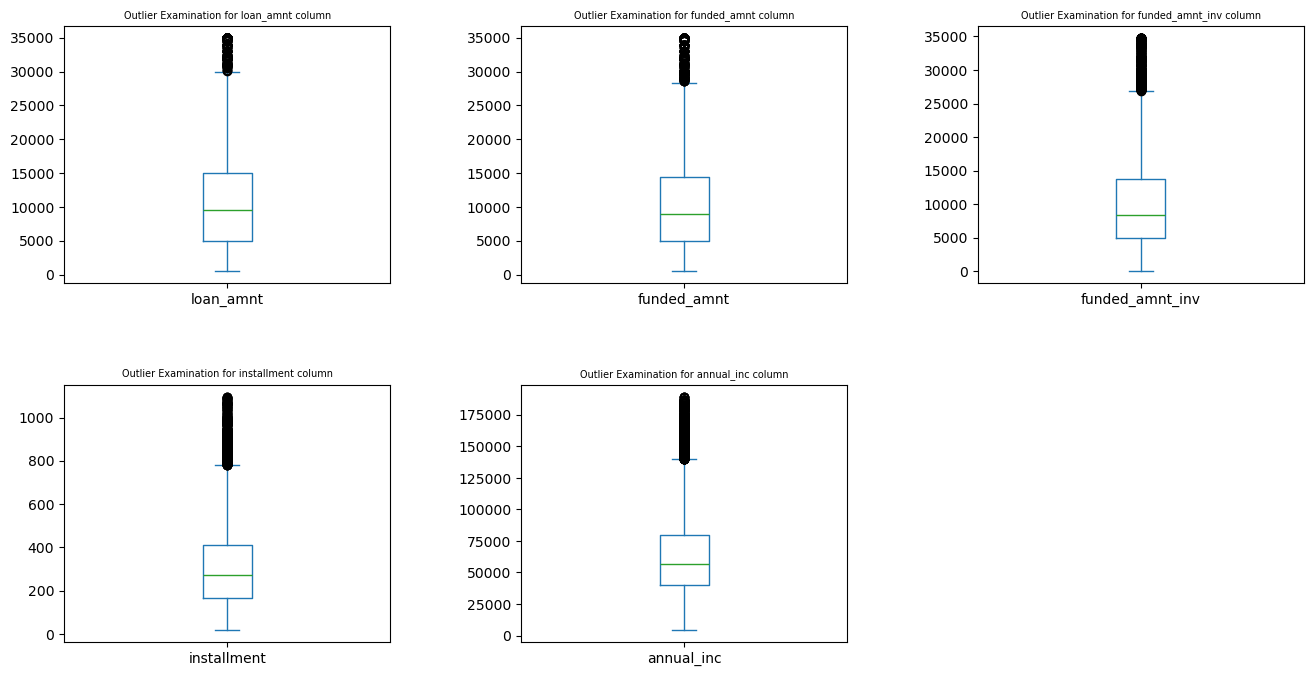

In [53]:
outlier_plot(df_clean, cols)
df_clean.shape

### Below is the data dictionary for the remaining columns on which we will conduct the analysis.

In [54]:
data_dictionary

LoanStatNew  \
0             addr_state   
1             annual_inc   
2                    dti   
3             emp_length   
4            funded_amnt   
5        funded_amnt_inv   
6                  grade   
7         home_ownership   
8            installment   
9               int_rate   
10               issue_d   
11             loan_amnt   
12           loan_status   
13  pub_rec_bankruptcies   
14               purpose   
15             sub_grade   
16                  term   
17   verification_status   

                                                                                                                                                                                                 Description  
0                                                                                                                                                 The state provided by the borrower in the loan application  
1                                                                                                                              The self-reported annual income provided by the borrower during registration.  
2   A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.  
3                                                                         Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.   
4                                                                                                                                             The total amount committed to that loan at that point in time.  
5                                                                                                                               The total amount committed by investors for that loan at that point in time.  
6                                                                                                                                                                                     LC assigned loan grade  
7                                                                                        The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.  
8                                                                                                                                           The monthly payment owed by the borrower if the loan originates.  
9                                                                                                                                                                                  Interest Rate on the loan  
10                                                                                                                                                                       The month which the loan was funded  
11                              The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.  
12                                                                                                                                                                                Current status of the loan  
13                                                                                                                                                                      Number of public record bankruptcies  
14                                                                                                                                                A category provided by the borrower for the loan request.   
15                                                                                                                                                                      

### Below is the segregation of Customer and Loan attributes post Data Assessment and Cleaning

__Customer Attributes__
> 1. annual_inc → Float Data Type
> 2. debt_to_income → Float Data Type
> 3. pub_rec_bankruptcies → Float Data Type
> 4. home_ownership → Categorical Data Type
> 5. addr_state → String Data Type
> 6. emp_length → Categorical Data Type

__Loan Attributes__
> 1. term → Categorical Data Type
> 2. issue_d → DateTime Data Type
> 3. grade → Categorical Data Type
> 4. sub_grade → Categorical Data Type
> 5. verification_status → Categorical Data Type
> 6. loan_status → Categorical Data Type
> 7. purpose → Categorical Data Type
> 8. loan_amnt → Float Data Type
> 9. funded_amnt → Float Data Type
> 10. funded_amnt_inv → Float Data Type
> 11. int_rate → Float Data Type
> 12. installment → Float Data Type


__Derived Attributes__
> 1. issue_d_year → Integer Data Type
> 2. issue_d_month → Categorical Data Type
> 3. loan_amnt_b → Categorical Data Type

In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37485 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             37485 non-null  float64       
 1   funded_amnt           37485 non-null  float64       
 2   funded_amnt_inv       37485 non-null  float64       
 3   term                  37485 non-null  category      
 4   int_rate              37485 non-null  float64       
 5   installment           37485 non-null  float64       
 6   grade                 37485 non-null  category      
 7   sub_grade             37485 non-null  category      
 8   emp_length            37485 non-null  category      
 9   home_ownership        37485 non-null  category      
 10  annual_inc            37485 non-null  float64       
 11  verification_status   37485 non-null  category      
 12  issue_d               37485 non-null  datetime64[ns]
 13  loan_status          

In [56]:
numeric_columns  = df_clean.select_dtypes(exclude=['object','datetime','category']).columns.tolist()
categorical_columns = df_clean.select_dtypes(include=['category']).columns.tolist()
extra_columns = df_clean.select_dtypes(include=['object','datetime']).columns.tolist()
print("numeric_columns : ", numeric_columns)
print("categorical_columns : ", categorical_columns)
print("extra_columns : ", extra_columns)

numeric_columns :  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'debt_to_income', 'pub_rec_bankruptcies', 'issue_d_year']
categorical_columns :  ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'issue_d_month', 'loan_amnt_b']
extra_columns :  ['issue_d', 'purpose', 'addr_state']


# Exploratory Data Analisys

#### __Univariate Analysis__ 
 → Mean, Median, Max, Min, Std, Variance, Count
 → Distribution ( Histogram, CountPlot, BoxPlot)
#### __Bivariate Analysis__
 → Relationship Between 2 Variables ( ScatterPlot, BoxPlot, BarPlot etc)
#### __Multivariate Analysis__
 → Relationship Between more variables ( Heatmap etc.)m

In [57]:
numerical_columns  = df_clean.select_dtypes(exclude=['object','datetime','category']).columns.tolist()
cateogrical_columns = df_clean.select_dtypes(include=['category']).columns.tolist()
extra_columns = df_clean.select_dtypes(include=['object','datetime']).columns.tolist()
print("numerical_columns -> ", numeric_columns)
print("cateogrical_columns -> ", cateogrical_columns)
print("extra_columns -> ", extra_columns)

numerical_columns ->  ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'debt_to_income', 'pub_rec_bankruptcies', 'issue_d_year']
cateogrical_columns ->  ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'issue_d_month', 'loan_amnt_b']
extra_columns ->  ['issue_d', 'purpose', 'addr_state']


## Univariate Exploration

In [58]:
# Re-ordering categorical variables

# Sorting emp_length order
emp_length_order = df_clean['emp_length'].unique().tolist()
emp_length_order = sorted(emp_length_order, key=lambda emp_length_order: int(emp_length_order))
df_clean['emp_length'] = df_clean['emp_length'].cat.reorder_categories(emp_length_order)

In [59]:
# Class for performing univariate analysis on a specified column in a DataFrame.
class UnivariateAnalysis:
    # Initializes the UnivariateAnalysis object with the given DataFrame.
    def __init__(self, dataframe,column_name):
       
        self.dataframe = dataframe
        self.column_name = column_name
        print(f"Initiating detailed analysis of {column_name}...")
        print(f"\nStatistical summary for {self.column_name}:\n{self.dataframe[self.column_name].describe()}")
        mode = self.dataframe[self.column_name].mode()[0]
        print(f"\nThe mode of {self.column_name} is: {mode}\n")

    # Performs univariate analysis on the specified column with bins.
    def analyze_with_bins(self, bin_range=None, discrete=False):
        sns.set_style('whitegrid')
        plt.figure(figsize=(12, 6))

        sns.histplot(data=self.dataframe, x=self.column_name, bins=bin_range, discrete=discrete, kde=True, color='skyblue')
        plt.title(f'Distribution of {self.column_name} with Bins', fontsize=16, fontweight='bold')
        
        plt.xlabel(self.column_name, fontsize=14)
        plt.ylabel('Frequency', fontsize=14)
        plt.xticks(bin_range, rotation=45, fontsize=12)
        plt.yticks(fontsize=12)

        plt.tight_layout()
        plt.show()

    # Performs univariate analysis on the specified column without bins.
    def analyze_without_bins(self):
        sns.set_style('whitegrid')
    
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        
        sns.histplot(data=self.dataframe, x=self.column_name, ax=ax[0], kde=True, color='salmon')
        ax[0].set_title(f'{self.column_name} Histogram', fontsize=16, fontweight='bold')
    
        sns.boxplot(data=self.dataframe, y=self.column_name, ax=ax[1], palette='muted')
        ax[1].set_title(f'{self.column_name} Box Plot', fontsize=16, fontweight='bold')
    
        for axis in ax:
            axis.set_xlabel(self.column_name, fontsize=14)
            axis.set_ylabel('Frequency', fontsize=14)
            axis.tick_params(axis="x", rotation=45, labelsize=12)
            axis.tick_params(axis="y", labelsize=12)
    
        plt.tight_layout()
        plt.show()

Initiating detailed analysis of loan_amnt...

Statistical summary for loan_amnt:
count    37485.000000
mean     10678.593437
std       6884.877579
min        500.000000
25%       5000.000000
50%       9500.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The mode of loan_amnt is: 10000.0



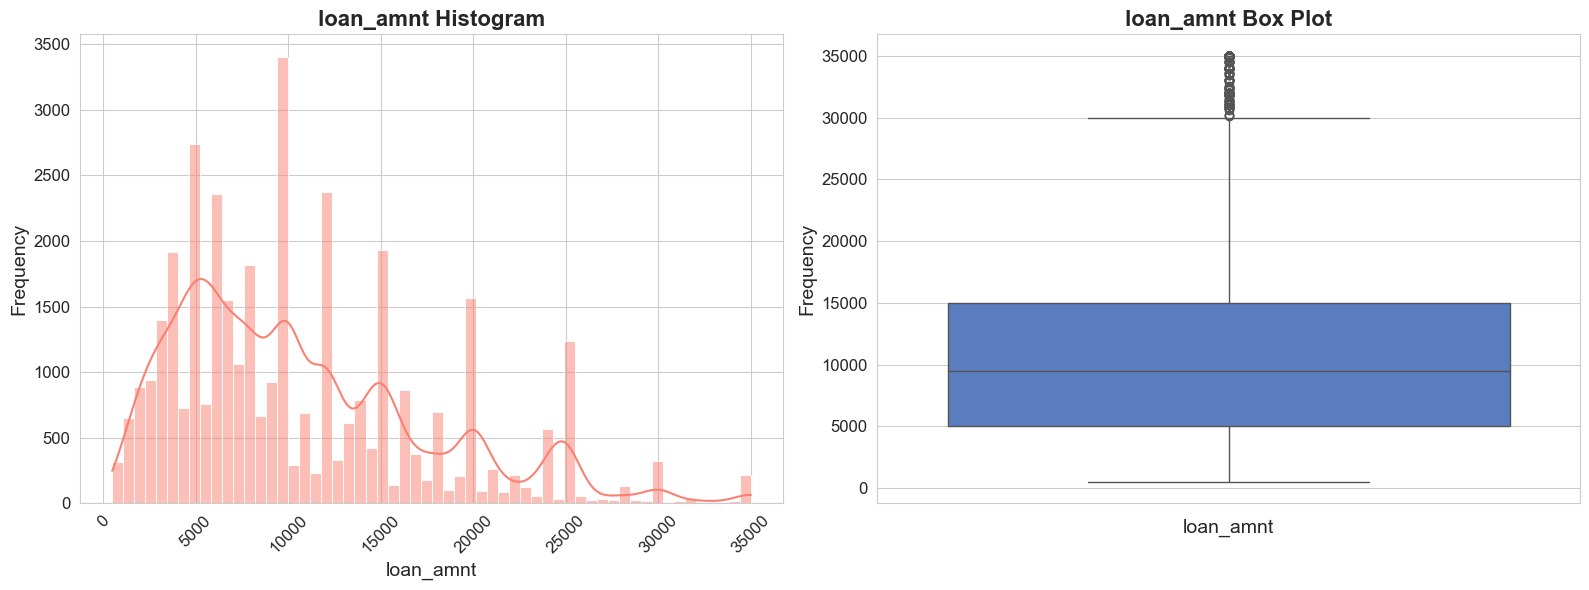

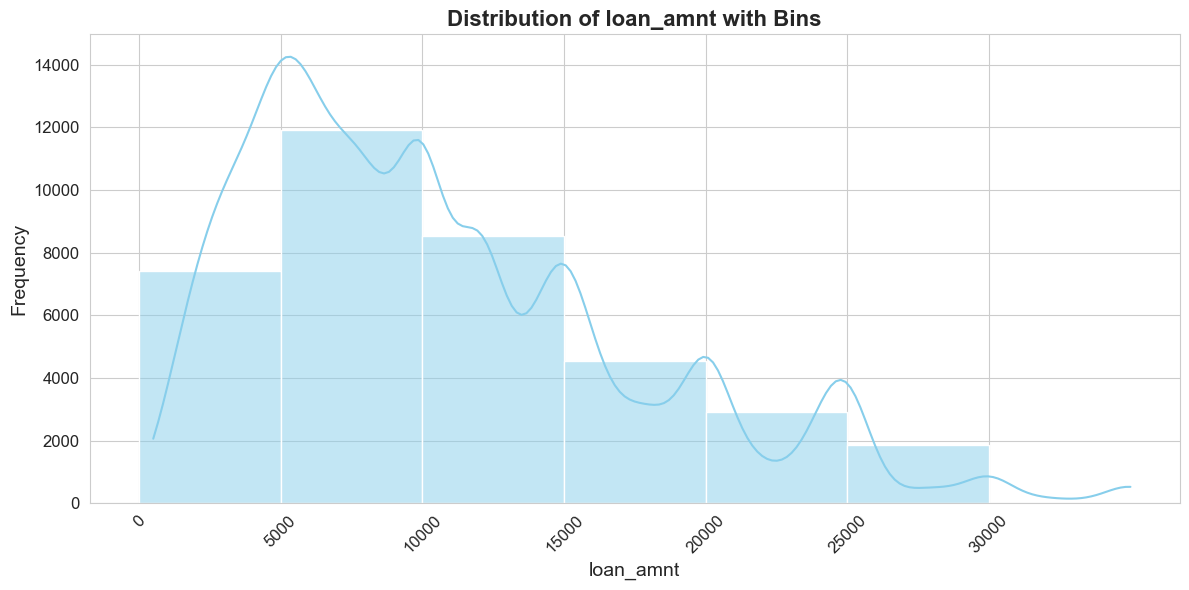

In [60]:
univariate_analysis = UnivariateAnalysis(df_clean, 'loan_amnt')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 35000, 5000))

##### __Observation__ : From the above distribution we can see that most of the loan application amount were between 5000-10000, followed by 0-5000 and then 10000-15000. However the mean for the loan amount is 10678 and the mode is 10000.

Initiating detailed analysis of annual_inc...

Statistical summary for annual_inc:
count     37485.00000
mean      63517.37955
std       32070.74777
min        4000.00000
25%       40000.00000
50%       57000.00000
75%       80000.00000
max      189000.00000
Name: annual_inc, dtype: float64

The mode of annual_inc is: 60000.0



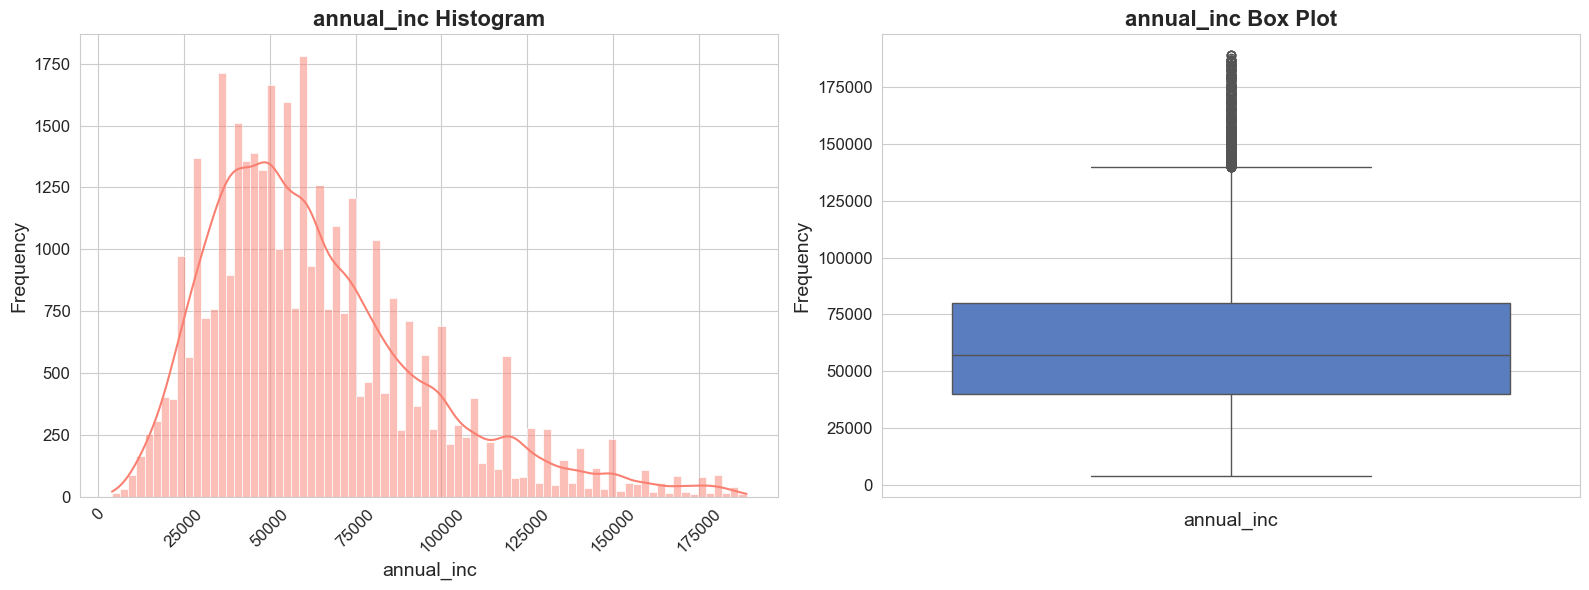

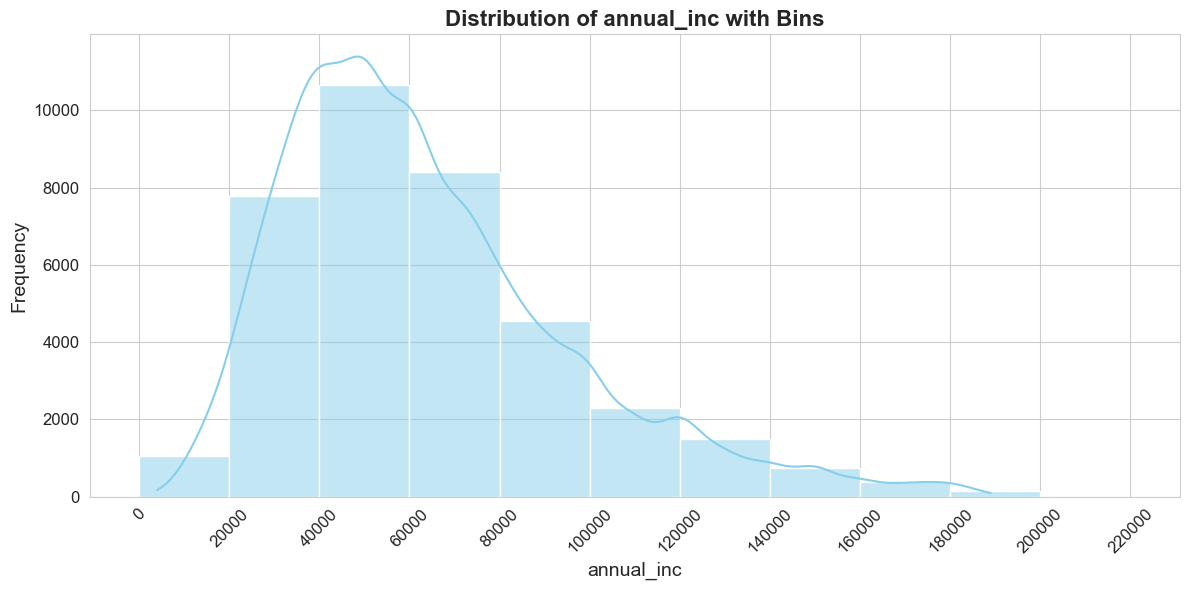

In [61]:
univariate_analysis = UnivariateAnalysis(df_clean, 'annual_inc')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 240000, 20000))

##### __Observation__ : From the above distribution we can see that most of the loan application where from customers whose annual income lies between 30000-60000. The mean of annual income of the customers is 63517 and the mode is 60000.

Initiating detailed analysis of int_rate...

Statistical summary for int_rate:
count    37485.000000
mean        11.878059
std          3.661481
min          5.420000
25%          8.940000
50%         11.710000
75%         14.270000
max         24.400000
Name: int_rate, dtype: float64

The mode of int_rate is: 10.99



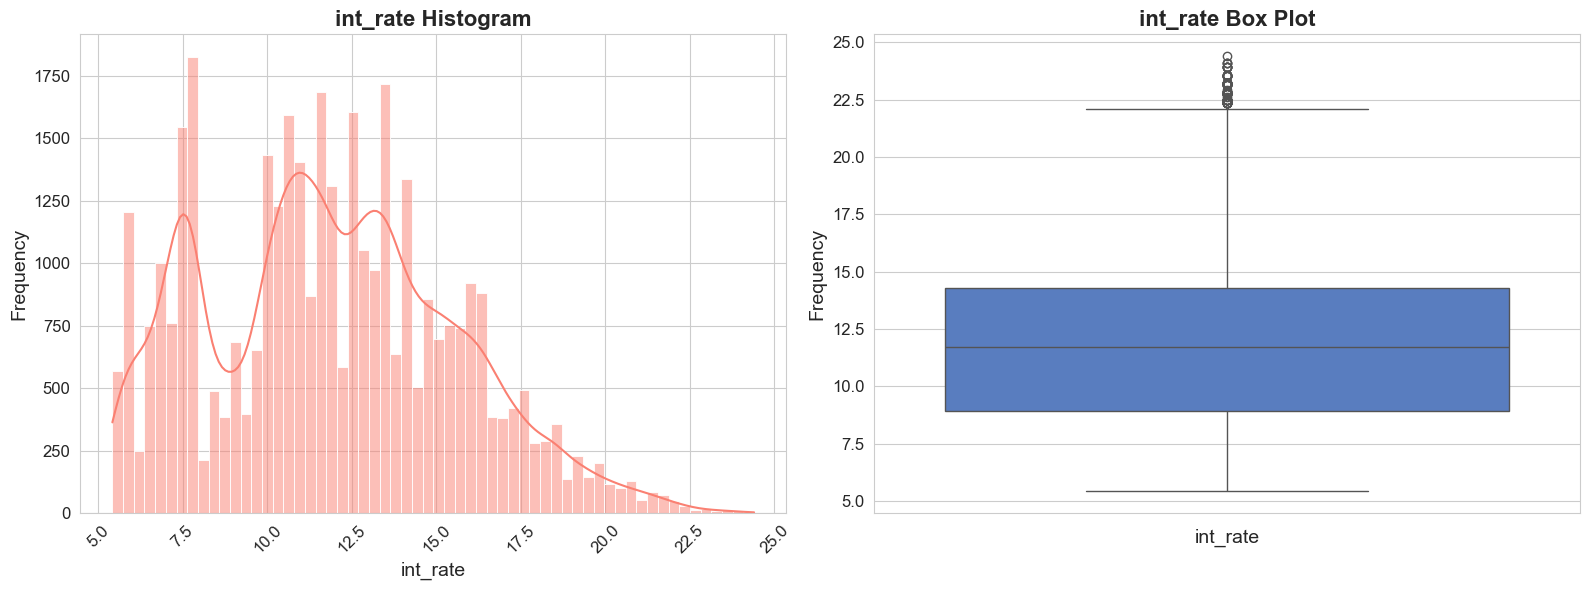

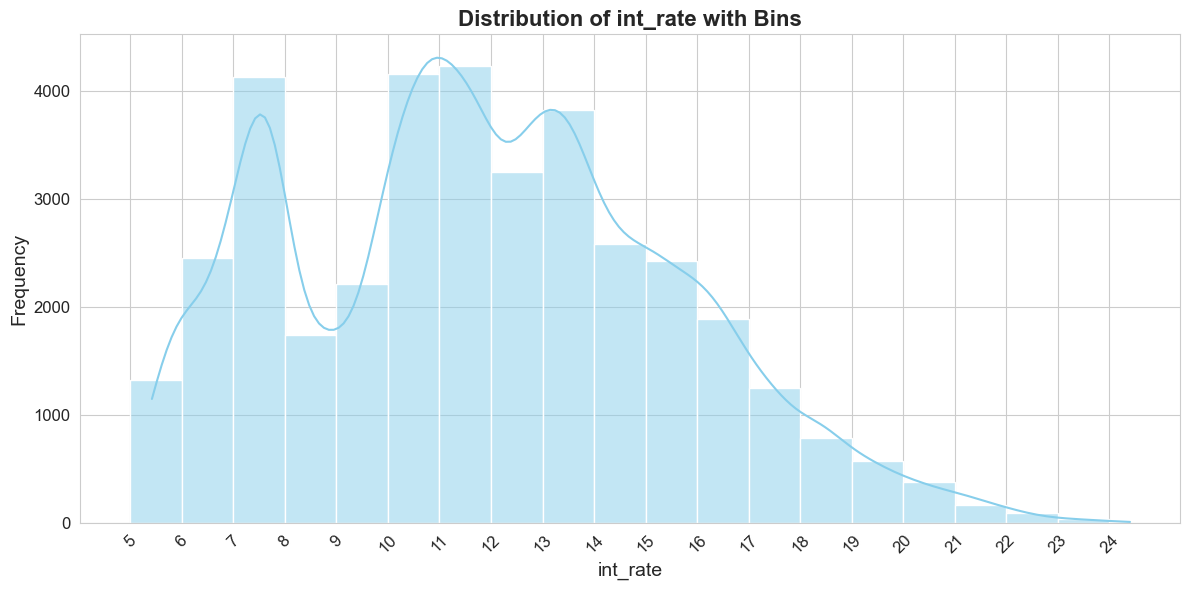

In [62]:
univariate_analysis = UnivariateAnalysis(df_clean, 'int_rate')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(5, 25, 1))

Initiating detailed analysis of debt_to_income...

Statistical summary for debt_to_income:
count    37485.000000
mean        13.364104
std          6.657783
min          0.000000
25%          8.250000
50%         13.470000
75%         18.630000
max         29.990000
Name: debt_to_income, dtype: float64

The mode of debt_to_income is: 0.0



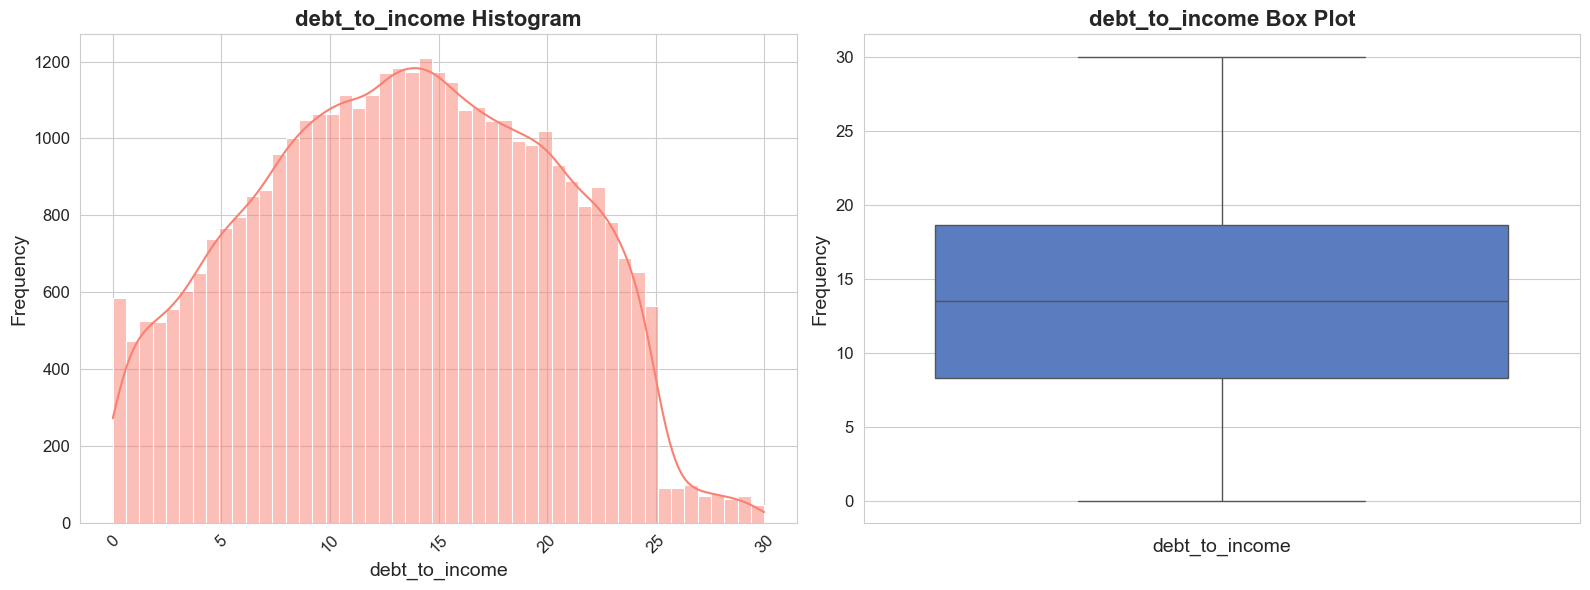

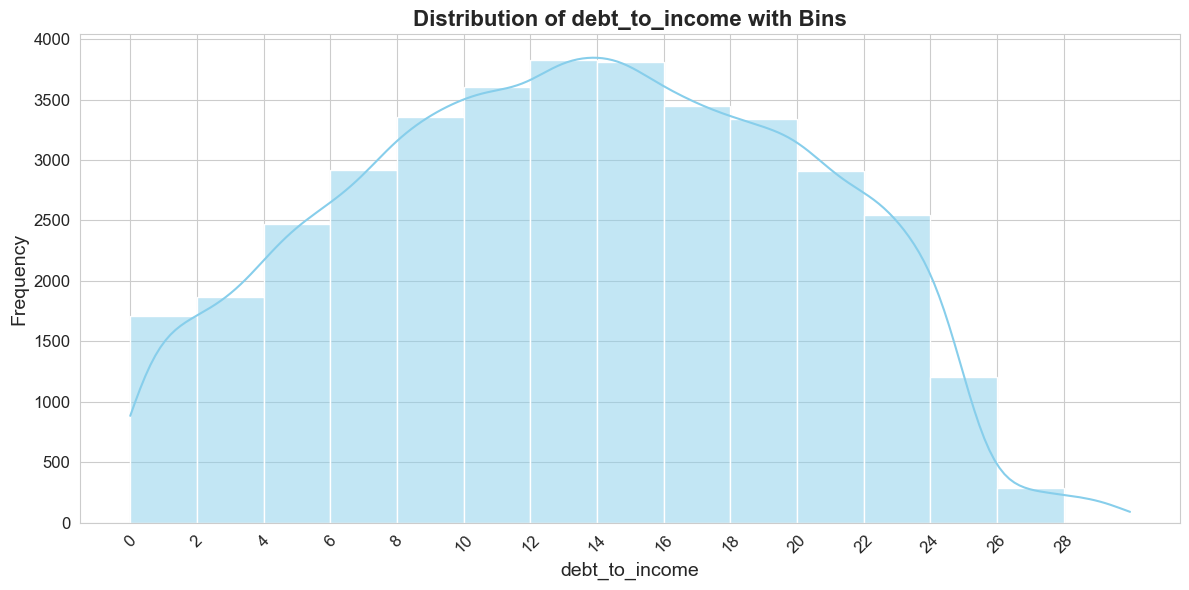

In [63]:
univariate_analysis = UnivariateAnalysis(df_clean, 'debt_to_income')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 30, 2))

Initiating detailed analysis of term...

Statistical summary for term:
count          37485
unique             2
top        36 months
freq           28417
Name: term, dtype: object

The mode of term is:  36 months



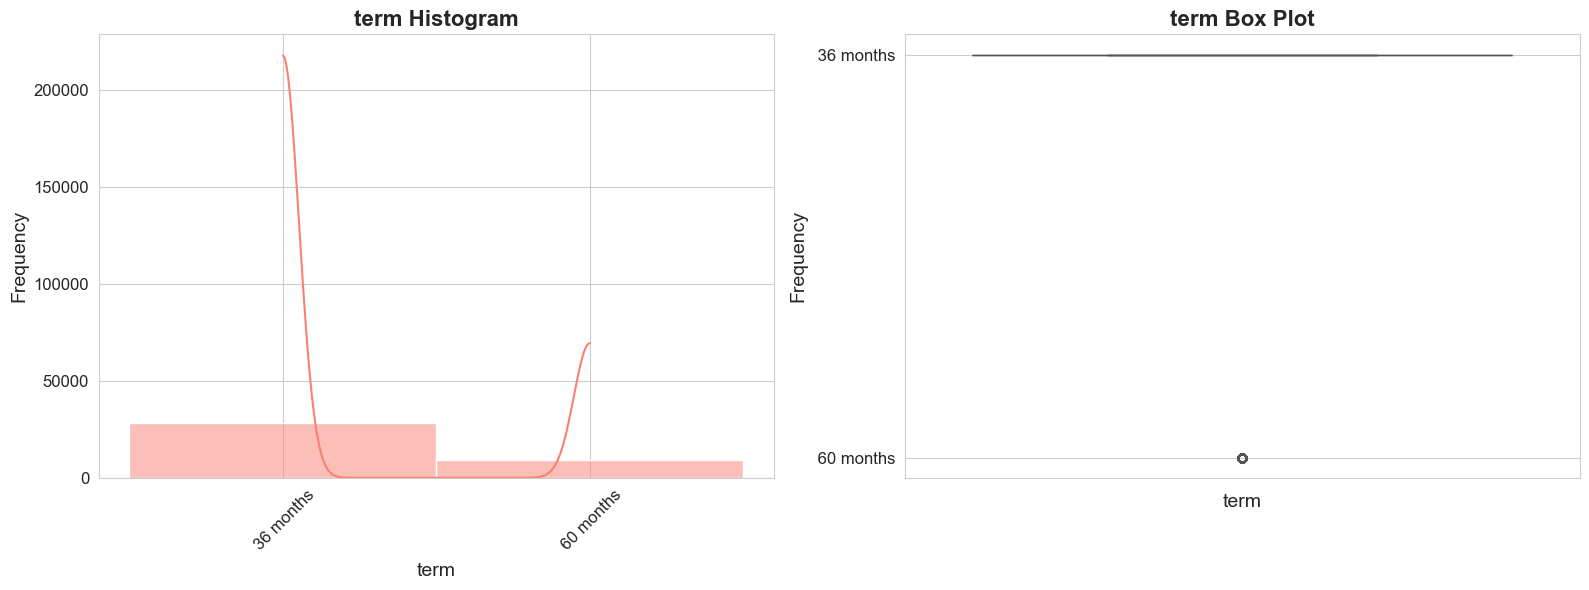

Initiating detailed analysis of grade...

Statistical summary for grade:
count     37485
unique        7
top           B
freq      11394
Name: grade, dtype: object

The mode of grade is: B



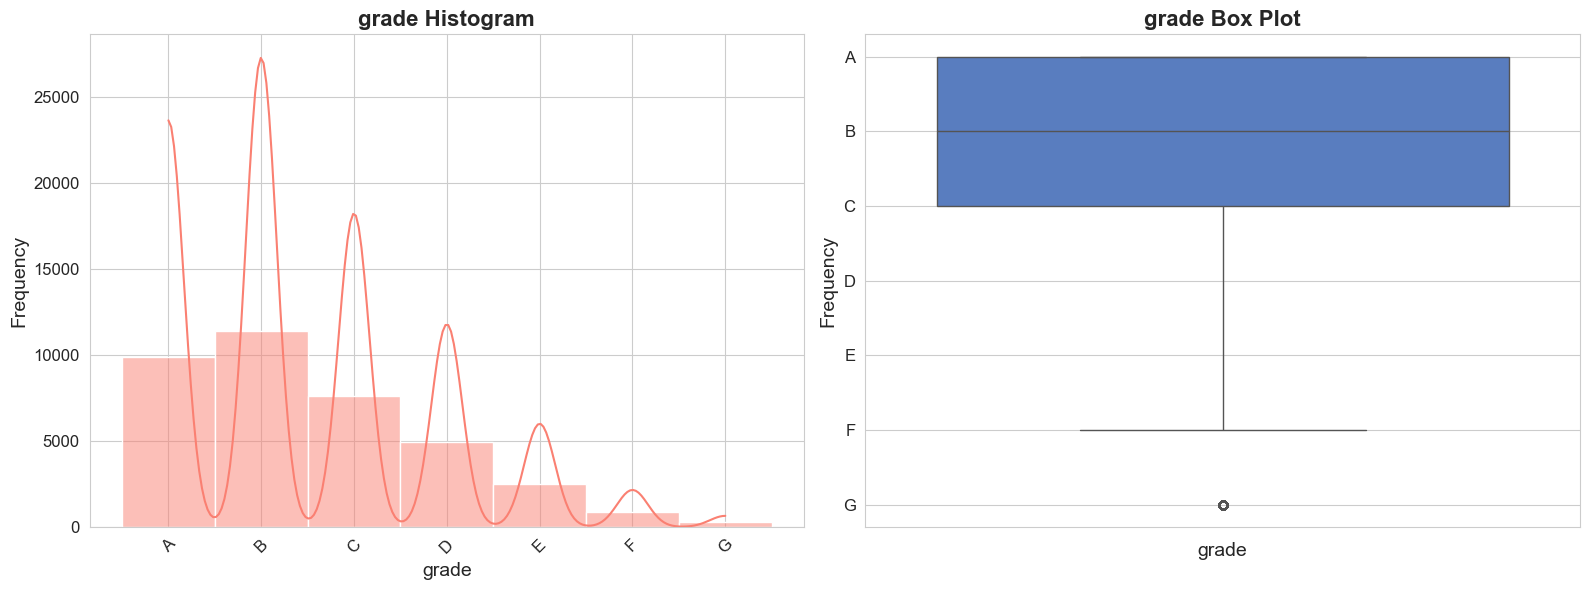

Initiating detailed analysis of sub_grade...

Statistical summary for sub_grade:
count     37485
unique        5
top           4
freq       7865
Name: sub_grade, dtype: object

The mode of sub_grade is: 4



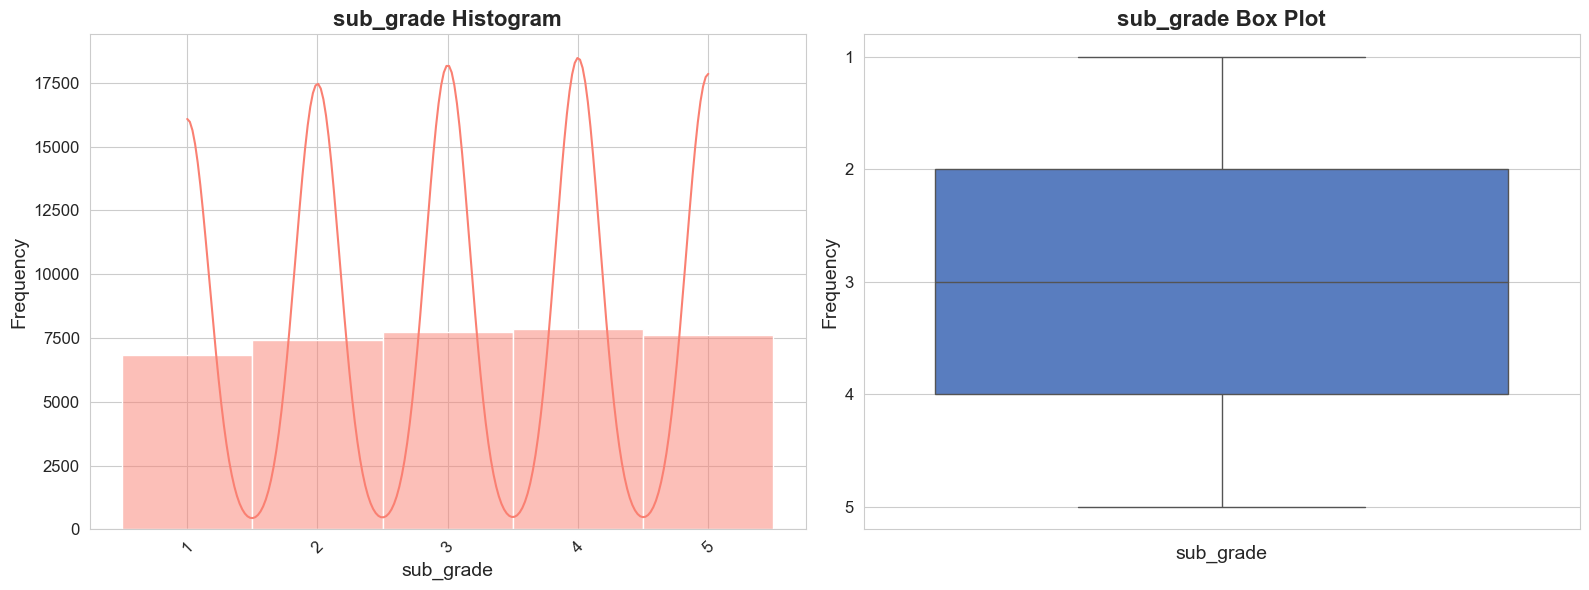

Initiating detailed analysis of emp_length...

Statistical summary for emp_length:
count     37485
unique       11
top         10 
freq       9131
Name: emp_length, dtype: object

The mode of emp_length is: 10 



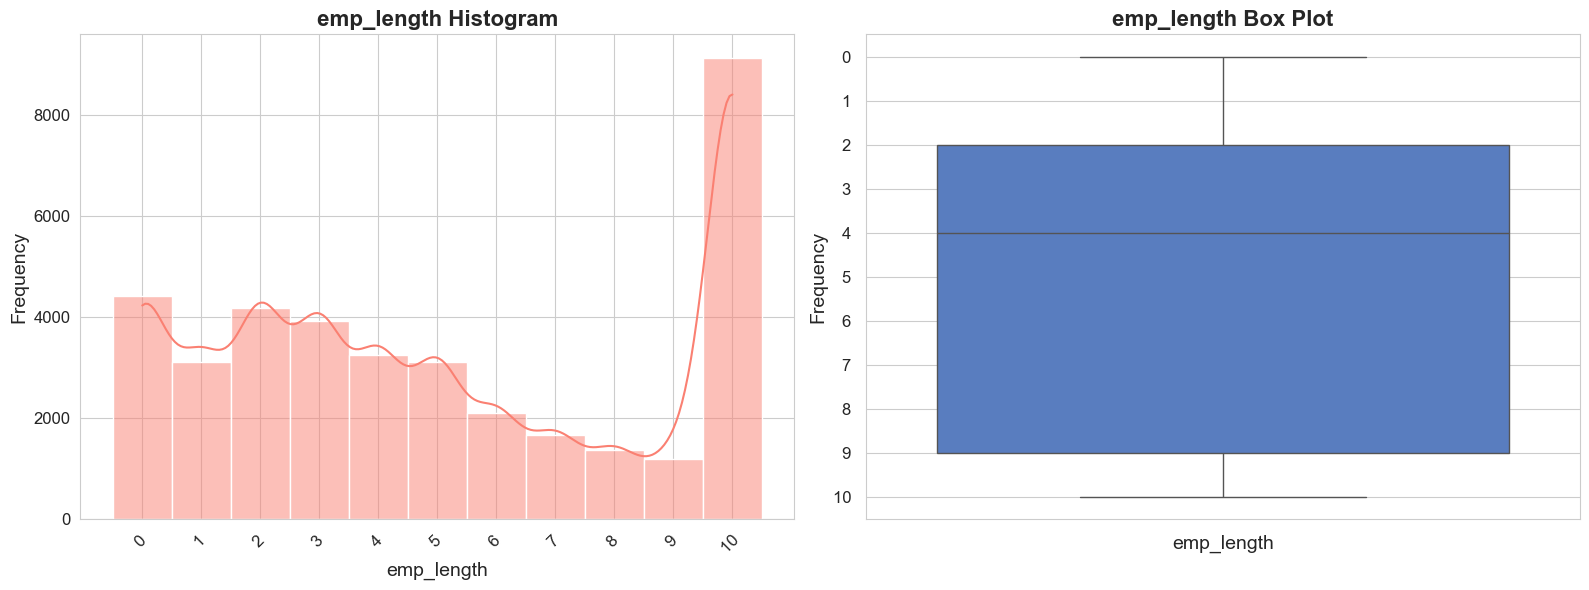

Initiating detailed analysis of home_ownership...

Statistical summary for home_ownership:
count     37485
unique        5
top        RENT
freq      18240
Name: home_ownership, dtype: object

The mode of home_ownership is: RENT



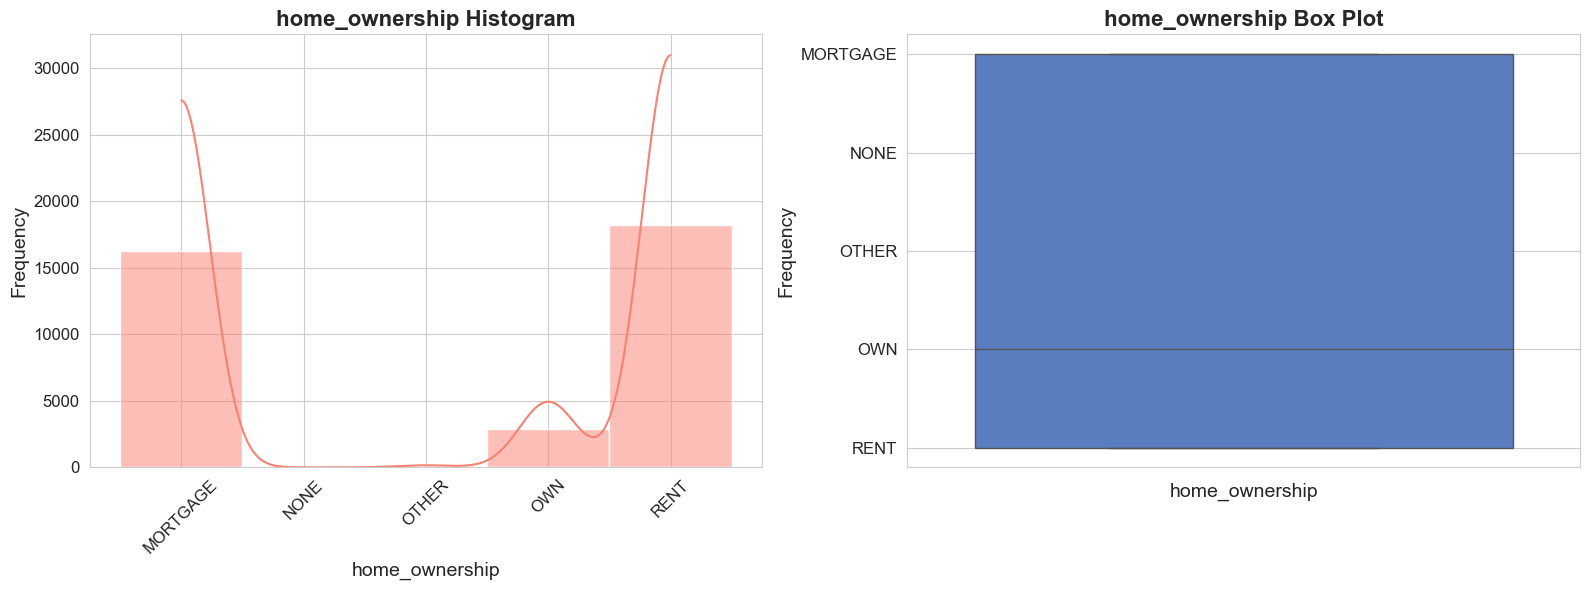

Initiating detailed analysis of verification_status...

Statistical summary for verification_status:
count            37485
unique               3
top       Not Verified
freq             16528
Name: verification_status, dtype: object

The mode of verification_status is: Not Verified



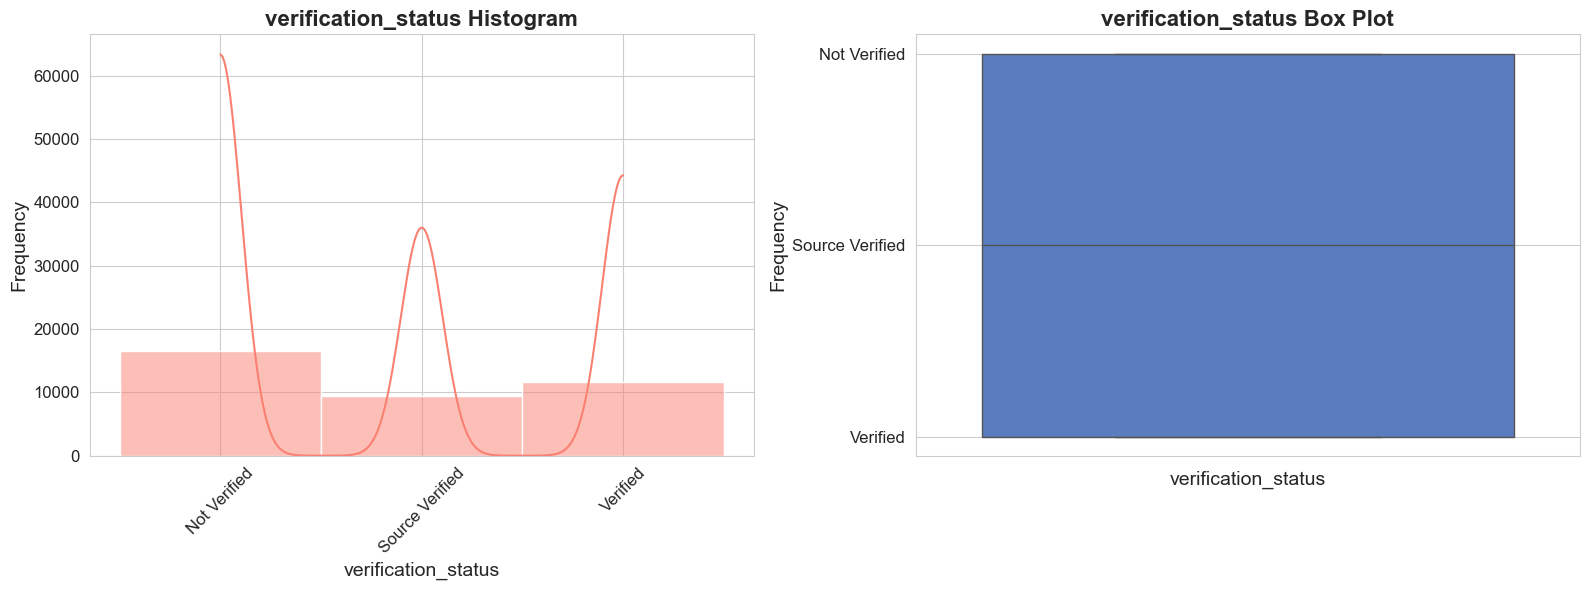

Initiating detailed analysis of loan_status...

Statistical summary for loan_status:
count          37485
unique             2
top       Fully Paid
freq           32026
Name: loan_status, dtype: object

The mode of loan_status is: Fully Paid



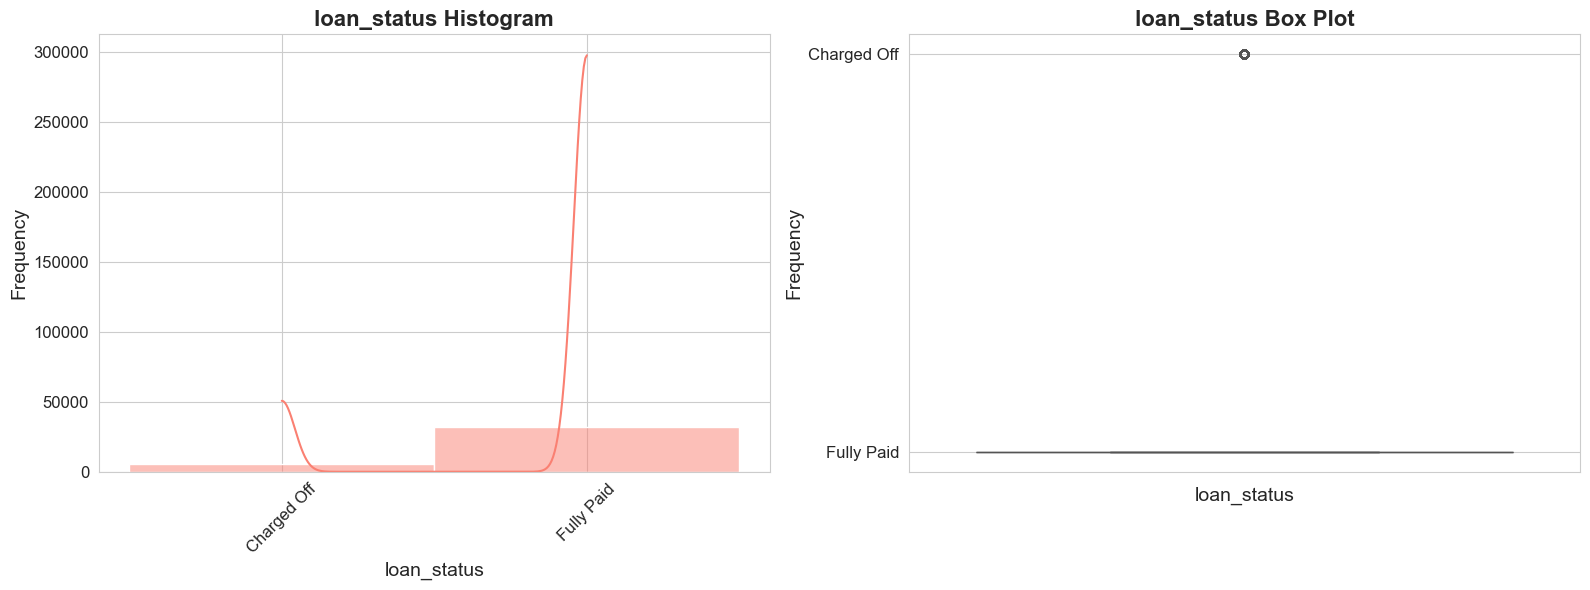

Initiating detailed analysis of issue_d_month...

Statistical summary for issue_d_month:
count        37485
unique          12
top       December
freq          4101
Name: issue_d_month, dtype: object

The mode of issue_d_month is: December



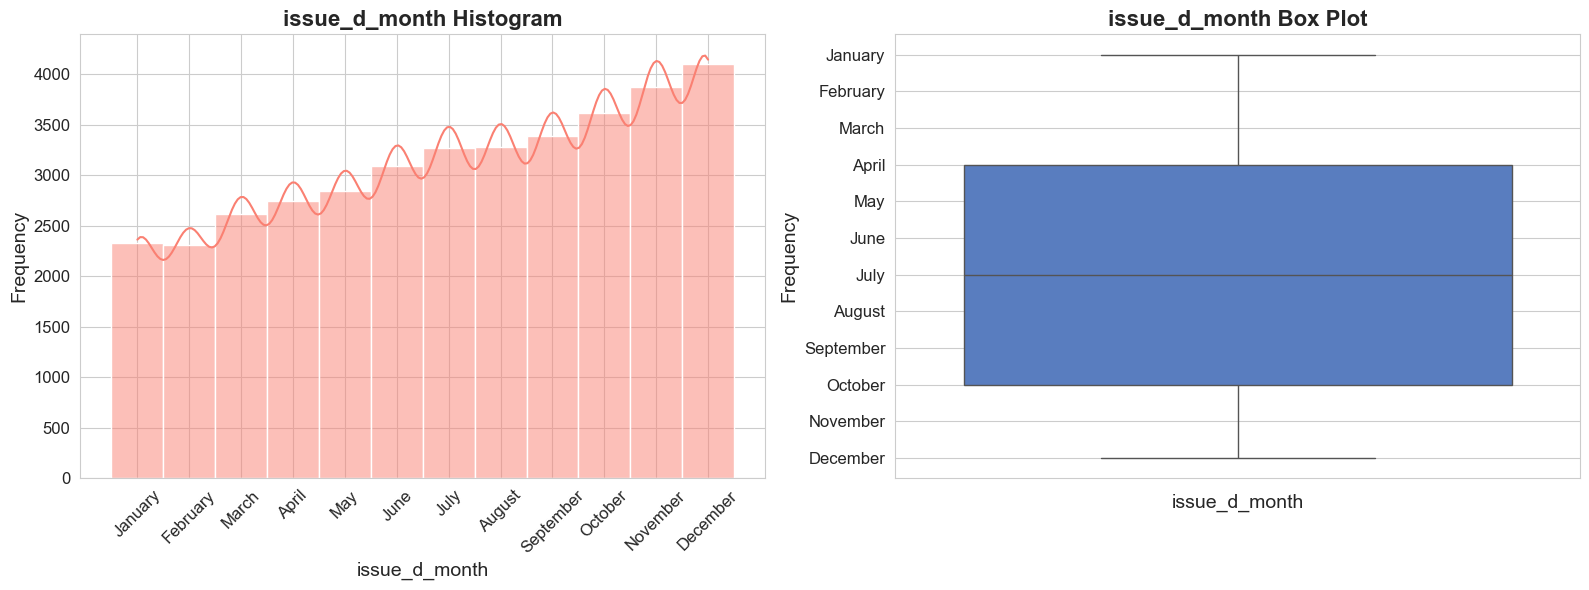

Initiating detailed analysis of loan_amnt_b...

Statistical summary for loan_amnt_b:
count          37169
unique             6
top       5000-10000
freq           12677
Name: loan_amnt_b, dtype: object

The mode of loan_amnt_b is: 5000-10000



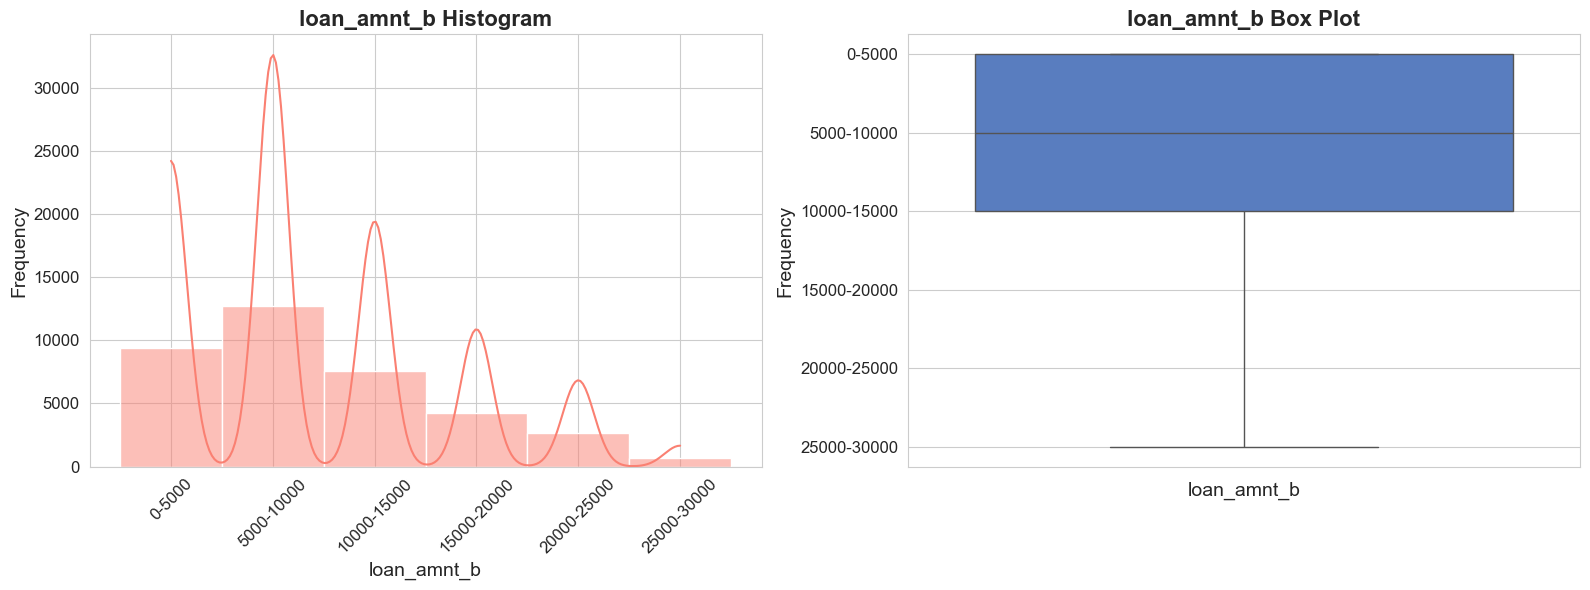

In [64]:
for category in categorical_columns:
    univariate_analysis = UnivariateAnalysis(df_clean, category)
    univariate_analysis.analyze_without_bins()

Initiating detailed analysis of issue_d_month...

Statistical summary for issue_d_month:
count        37485
unique          12
top       December
freq          4101
Name: issue_d_month, dtype: object

The mode of issue_d_month is: December



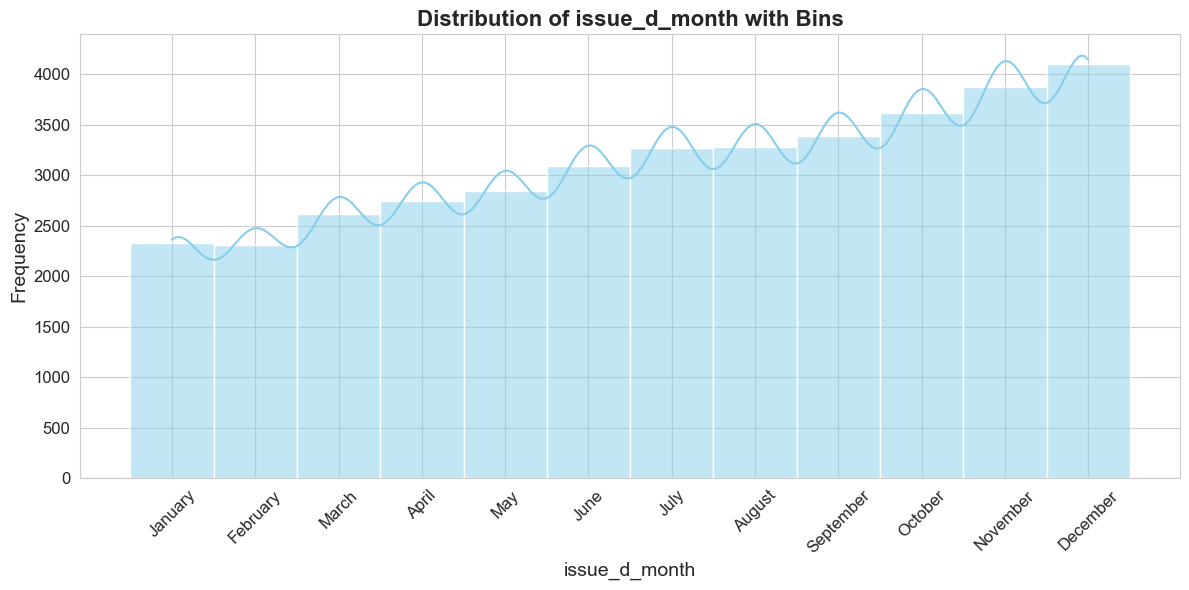

In [65]:
month_range = df_clean.issue_d_month.unique().tolist()
univariate_analysis = UnivariateAnalysis(df_clean, 'issue_d_month')
univariate_analysis.analyze_with_bins(bin_range=month_range, discrete=True)

Initiating detailed analysis of issue_d_year...

Statistical summary for issue_d_year:
count    37485.000000
mean      2010.303188
std          0.883444
min       2007.000000
25%       2010.000000
50%       2011.000000
75%       2011.000000
max       2011.000000
Name: issue_d_year, dtype: float64

The mode of issue_d_year is: 2011



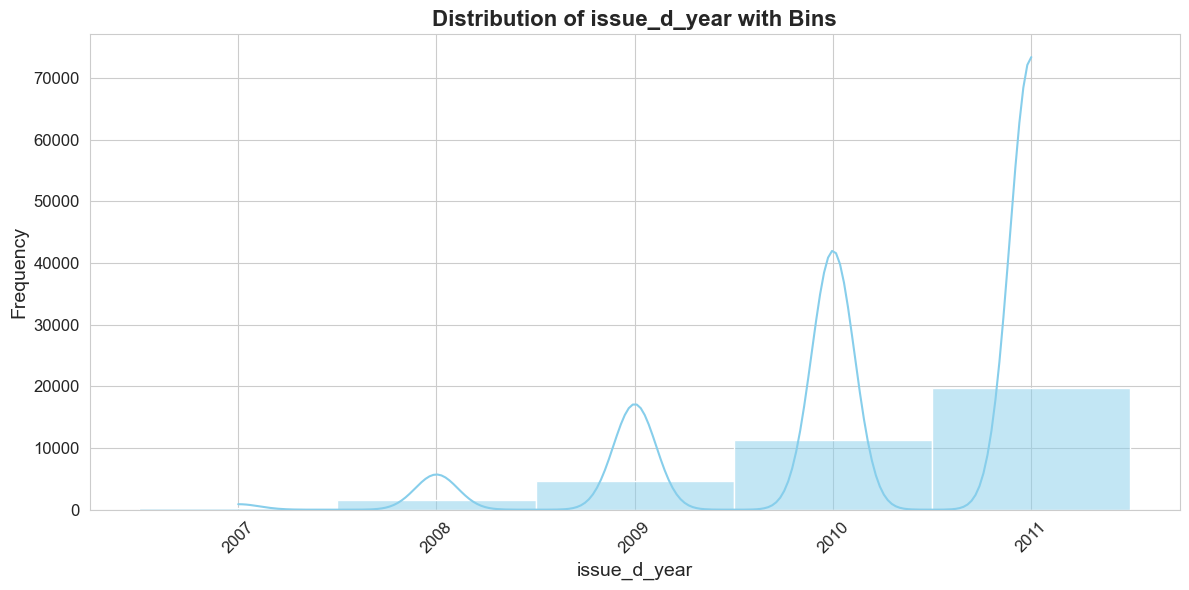

In [66]:
year_range = df_clean.issue_d_year.unique().tolist()
univariate_analysis = UnivariateAnalysis(df_clean, 'issue_d_year')
univariate_analysis.analyze_with_bins(bin_range=year_range, discrete=True)

## Segmented Univariate Exploration

#### Segmenting the loan status into 'fully_paid' and 'charged_off' and analyzing the impact of other parameters.

> Loan Status → Fully Paid 

In [67]:
df_fully_paid = df_clean[df_clean['loan_status'] == 'Fully Paid']
df_fully_paid.shape

(32026, 21)

Initiating detailed analysis of loan_amnt...

Statistical summary for loan_amnt:
count    32026.000000
mean     10520.196871
std       6760.853423
min        500.000000
25%       5000.000000
50%       9000.000000
75%      14500.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The mode of loan_amnt is: 10000.0



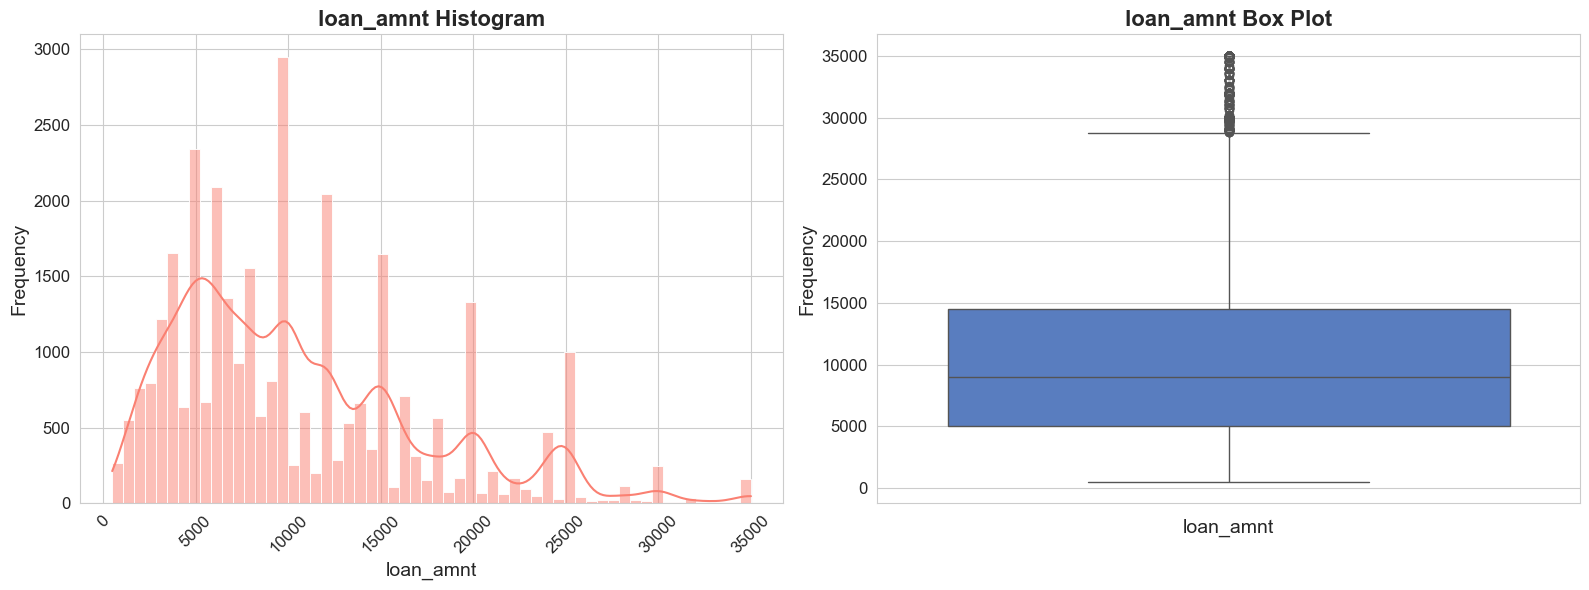

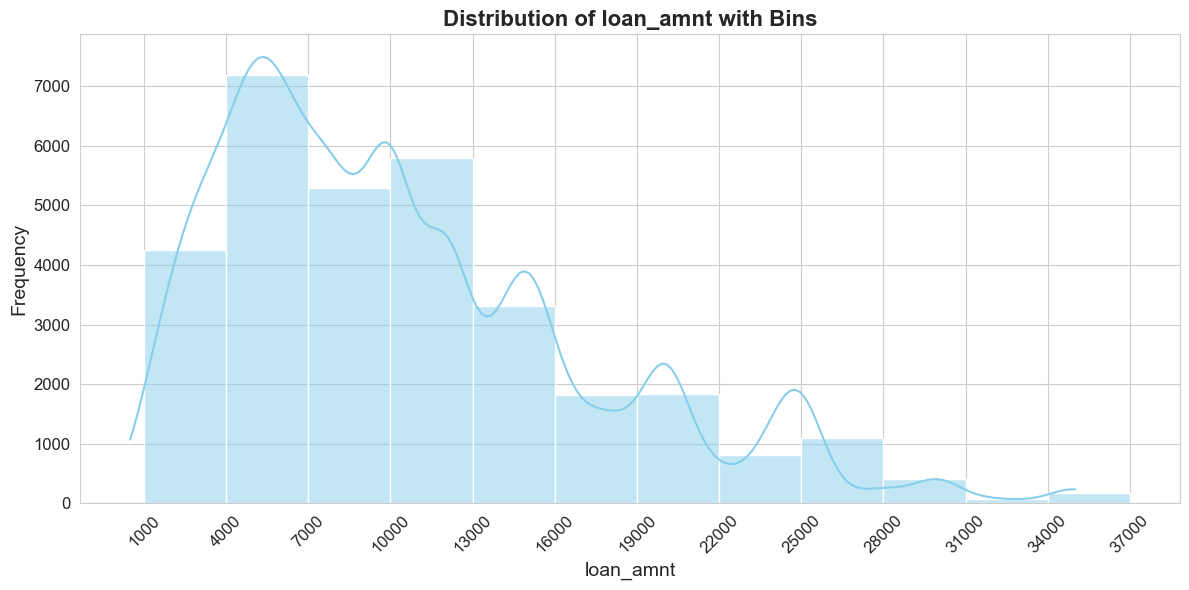

In [68]:
univariate_analysis = UnivariateAnalysis(df_fully_paid, 'loan_amnt')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(1000, 38000, 3000))

Initiating detailed analysis of int_rate...

Statistical summary for int_rate:
count    32026.000000
mean        11.561643
std          3.575163
min          5.420000
25%          8.490000
50%         11.490000
75%         13.980000
max         24.110000
Name: int_rate, dtype: float64

The mode of int_rate is: 10.99



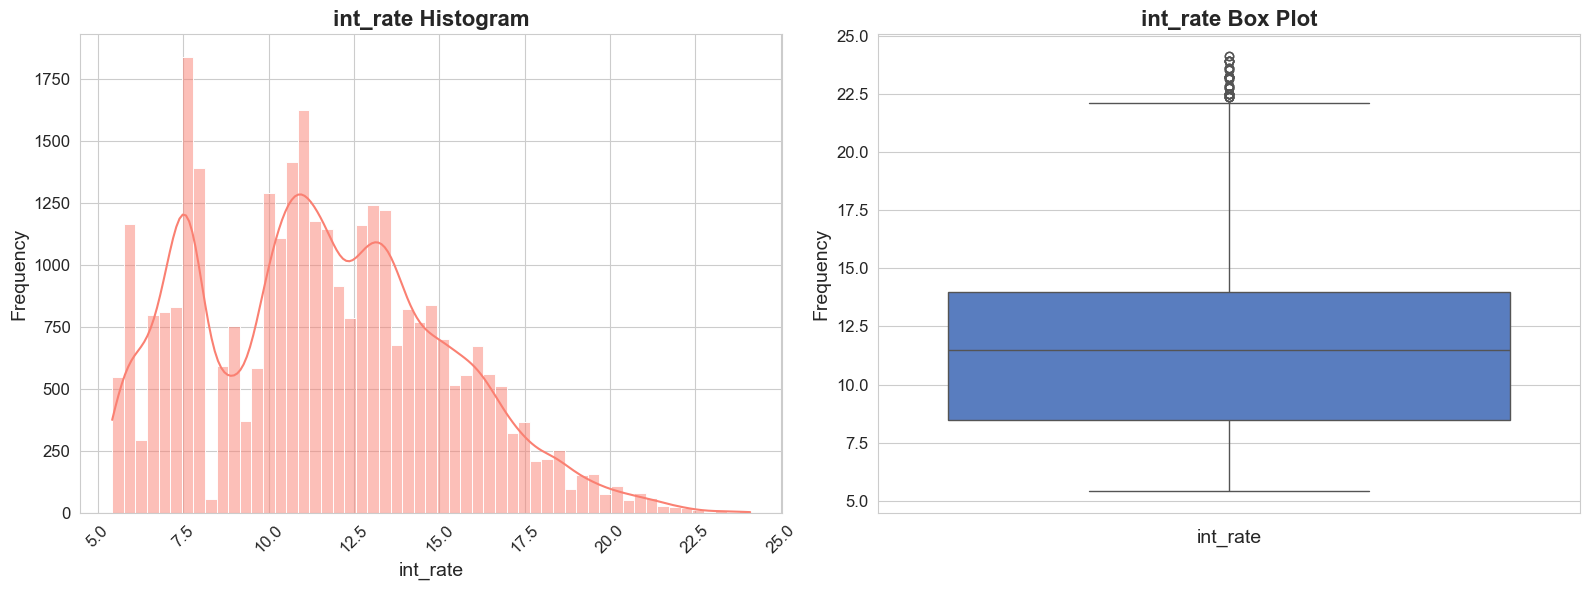

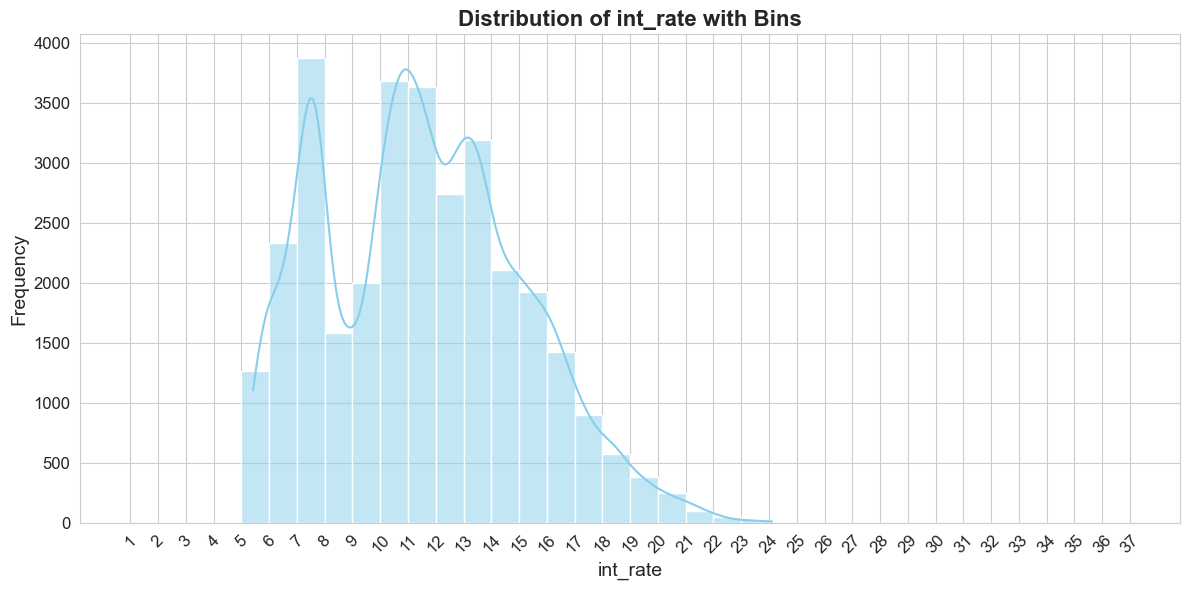

In [69]:
univariate_analysis = UnivariateAnalysis(df_fully_paid, 'int_rate')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(1, 38, 1))

Initiating detailed analysis of annual_inc...

Statistical summary for annual_inc:
count     32026.000000
mean      64411.371832
std       32263.098470
min        4000.000000
25%       40500.000000
50%       58000.000000
75%       80000.000000
max      189000.000000
Name: annual_inc, dtype: float64

The mode of annual_inc is: 60000.0



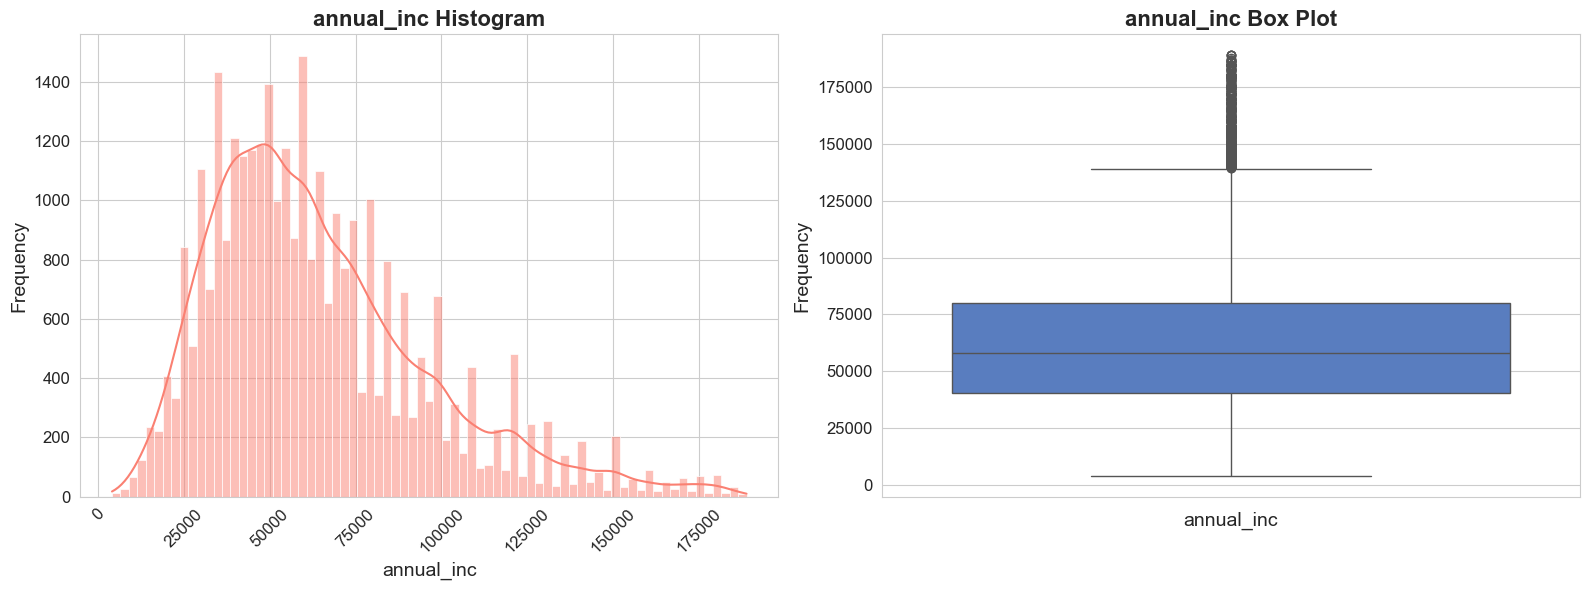

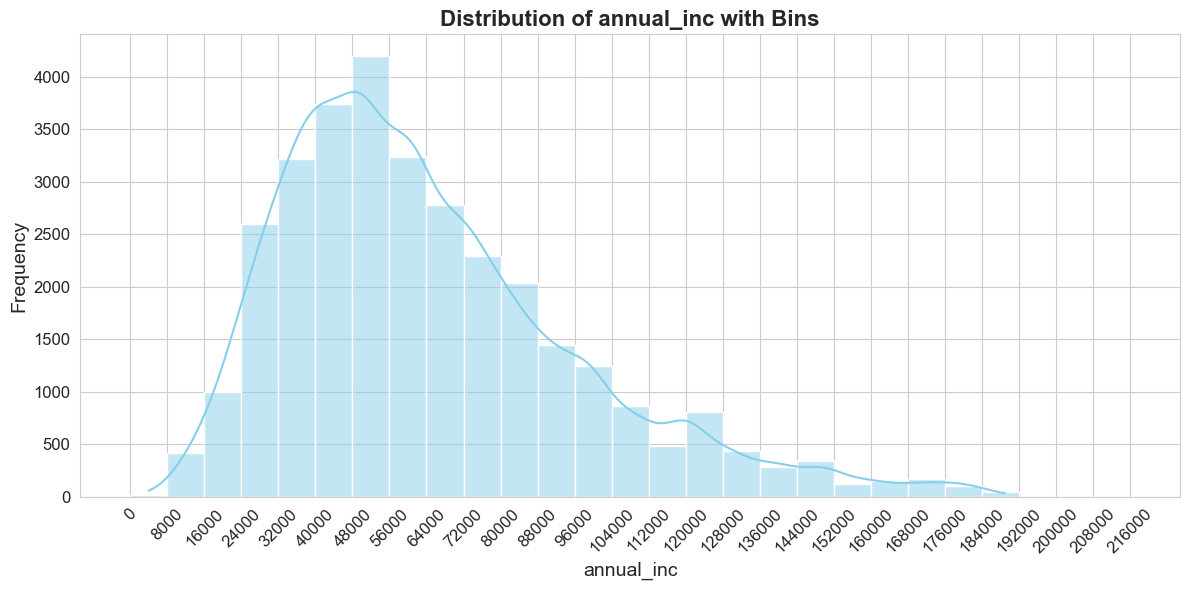

In [70]:
univariate_analysis = UnivariateAnalysis(df_fully_paid, 'annual_inc')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 220000, 8000))

Initiating detailed analysis of loan_amnt_b...

Statistical summary for loan_amnt_b:
count          31789
unique             6
top       5000-10000
freq           11046
Name: loan_amnt_b, dtype: object

The mode of loan_amnt_b is: 5000-10000



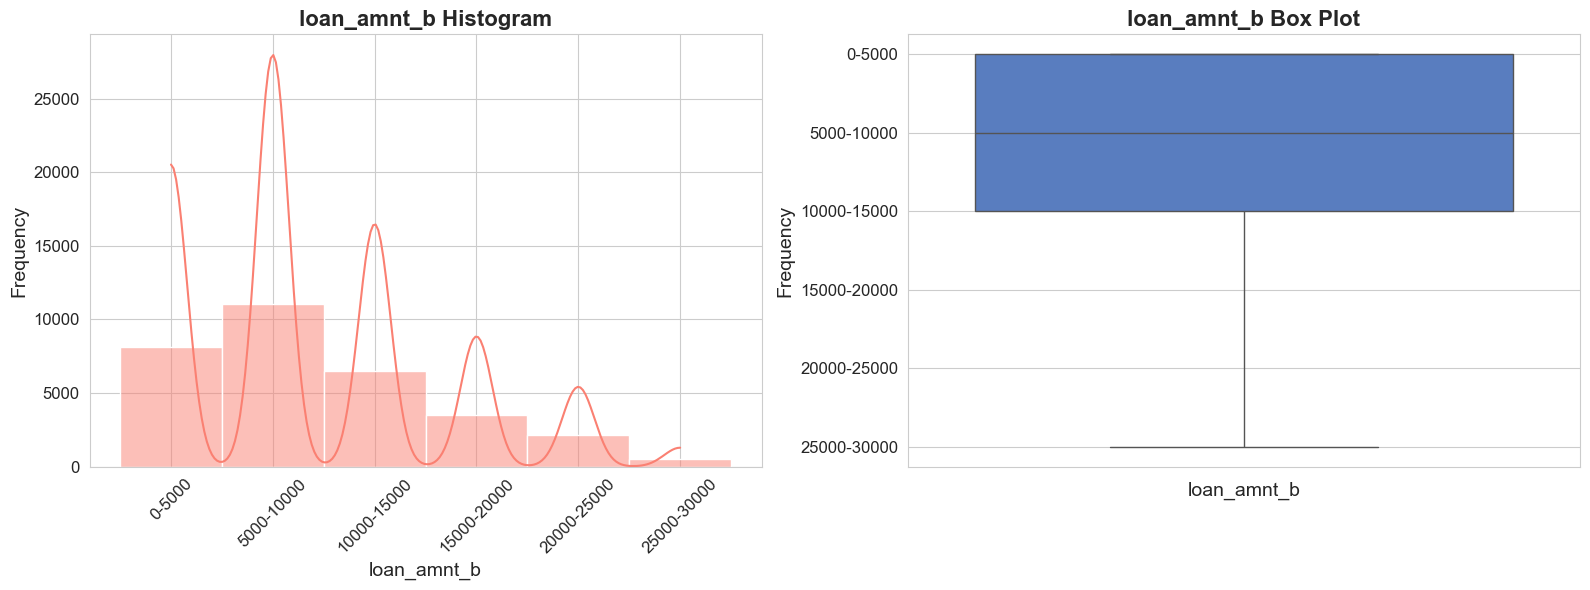

Initiating detailed analysis of grade...

Statistical summary for grade:
count     32026
unique        7
top           B
freq       9998
Name: grade, dtype: object

The mode of grade is: B



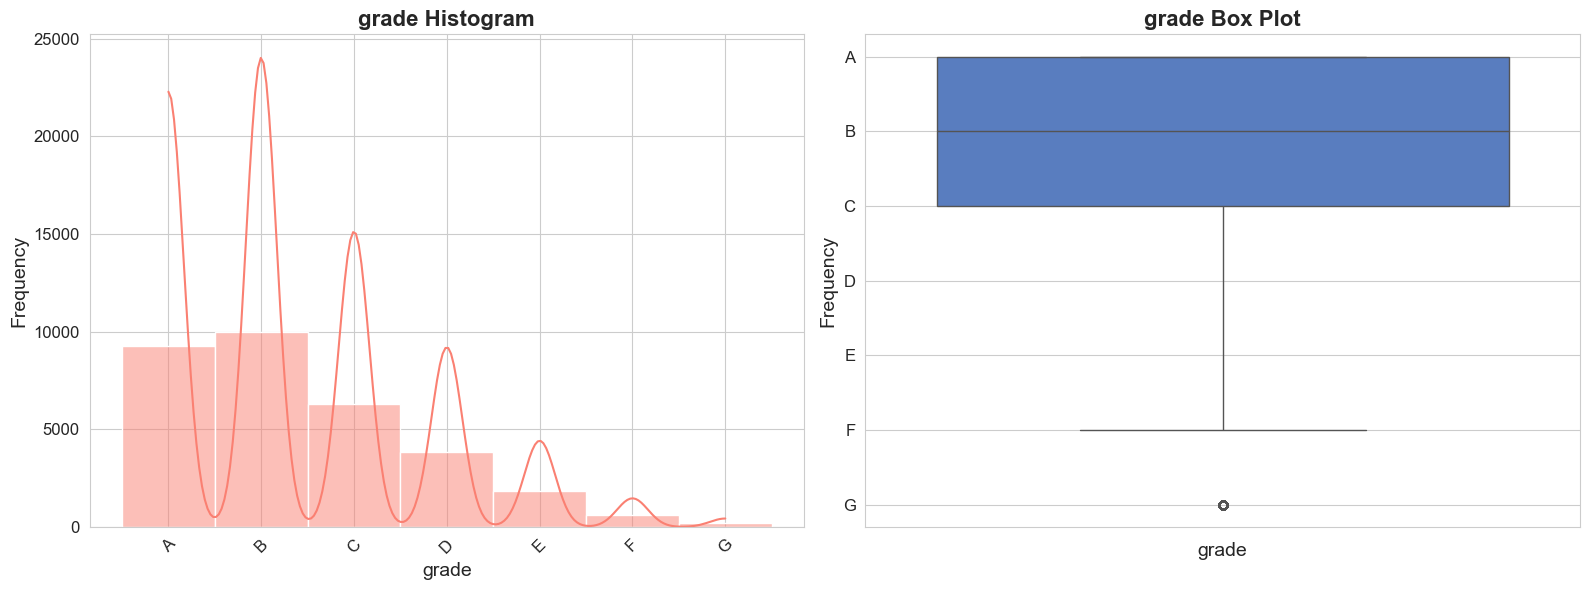

Initiating detailed analysis of emp_length...

Statistical summary for emp_length:
count     32026
unique       11
top         10 
freq       7644
Name: emp_length, dtype: object

The mode of emp_length is: 10 



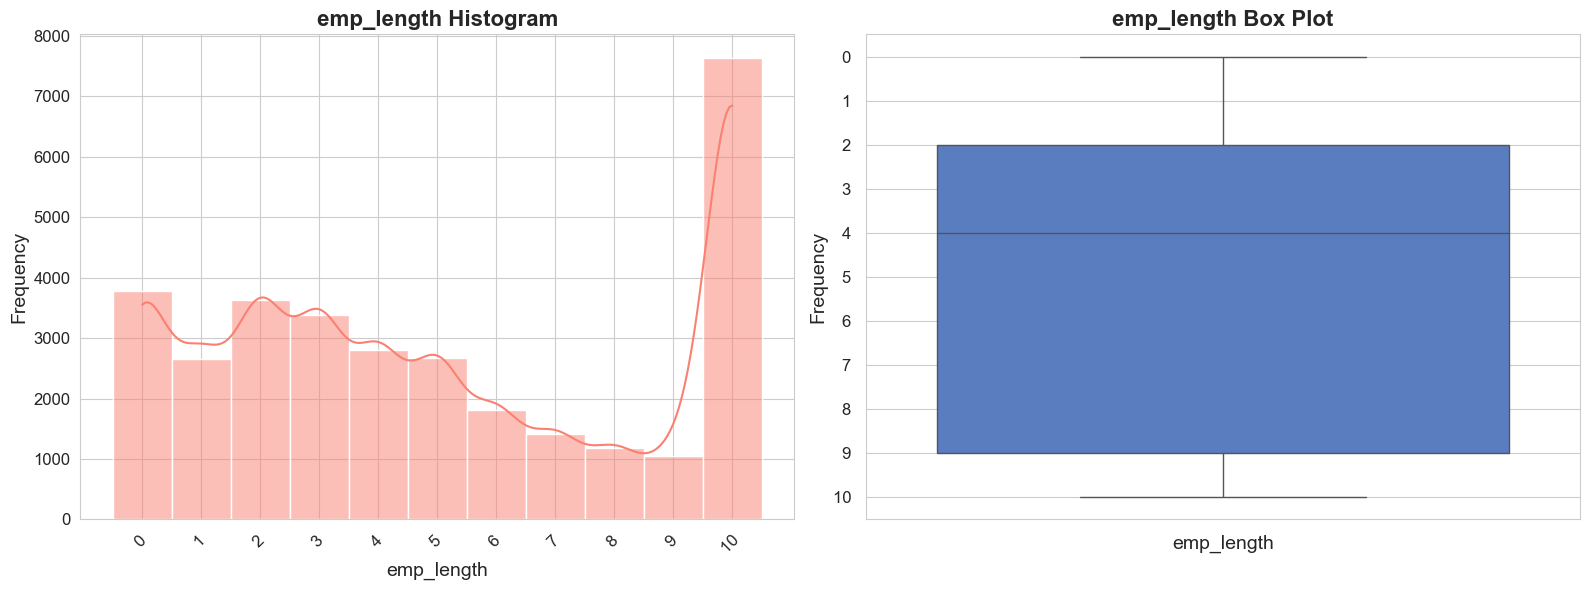

Initiating detailed analysis of verification_status...

Statistical summary for verification_status:
count            32026
unique               3
top       Not Verified
freq             14407
Name: verification_status, dtype: object

The mode of verification_status is: Not Verified



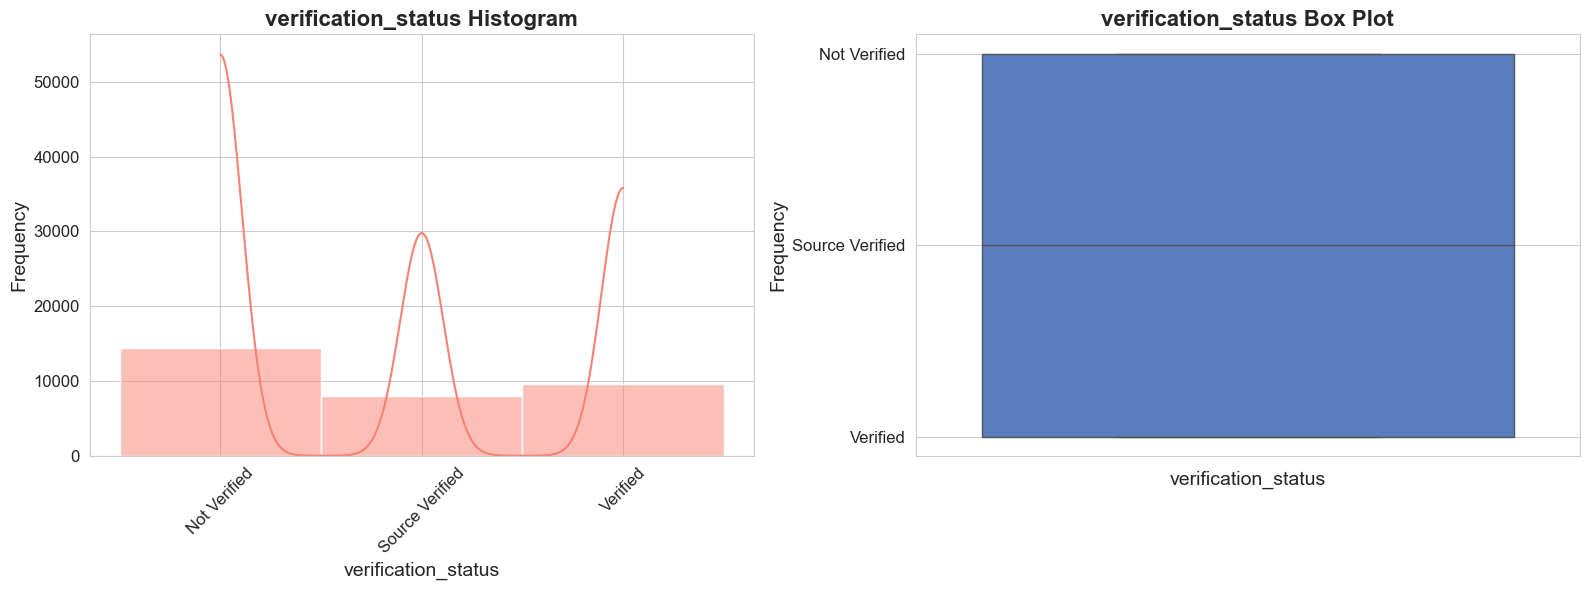

Initiating detailed analysis of home_ownership...

Statistical summary for home_ownership:
count     32026
unique        5
top        RENT
freq      15454
Name: home_ownership, dtype: object

The mode of home_ownership is: RENT



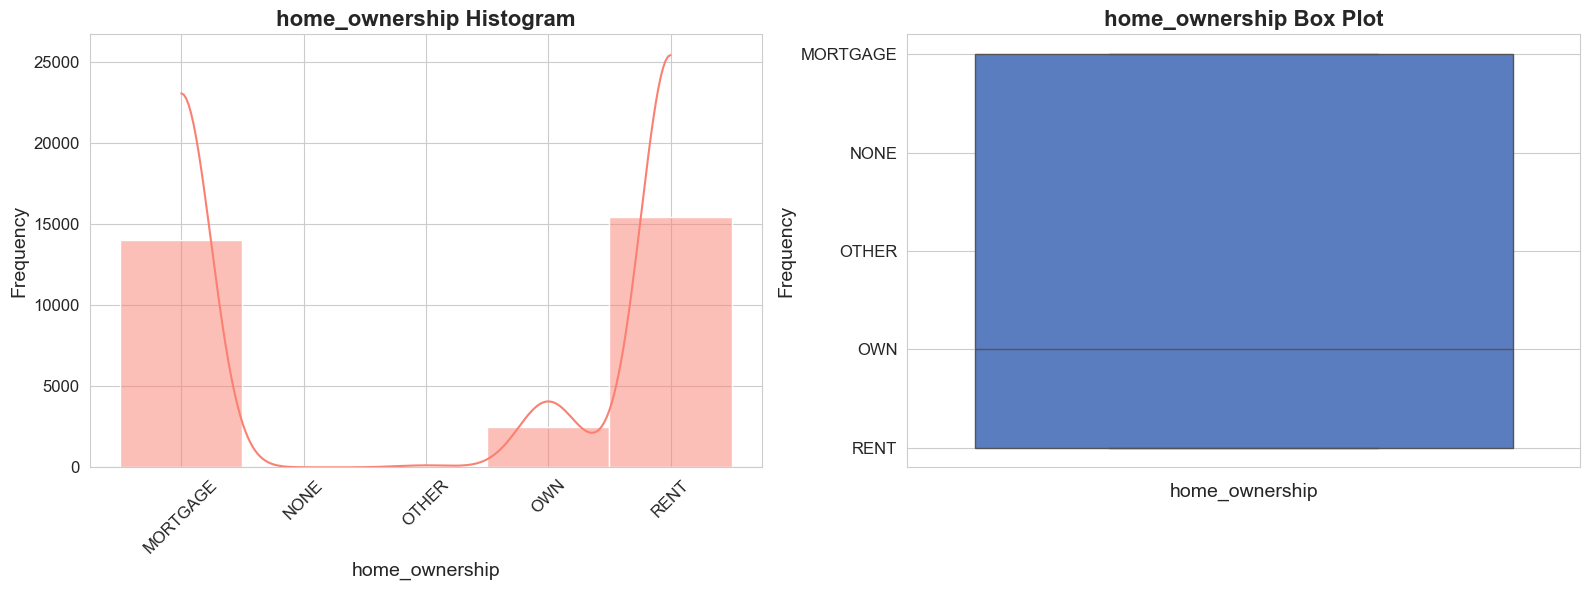

In [71]:
cat_columns = ['loan_amnt_b', 'grade', 'emp_length','verification_status', 'home_ownership']
for category in cat_columns:
    univariate_analysis = UnivariateAnalysis(df_fully_paid, category)
    univariate_analysis.analyze_without_bins()

> Loan Status → Charged Off 

In [72]:
df_charged_off = df_clean[df_clean['loan_status'] == 'Charged Off']
df_charged_off.shape

(5459, 21)

Initiating detailed analysis of loan_amnt...

Statistical summary for loan_amnt:
count     5459.000000
mean     11607.849423
std       7505.301274
min        900.000000
25%       5500.000000
50%      10000.000000
75%      16000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

The mode of loan_amnt is: 10000.0



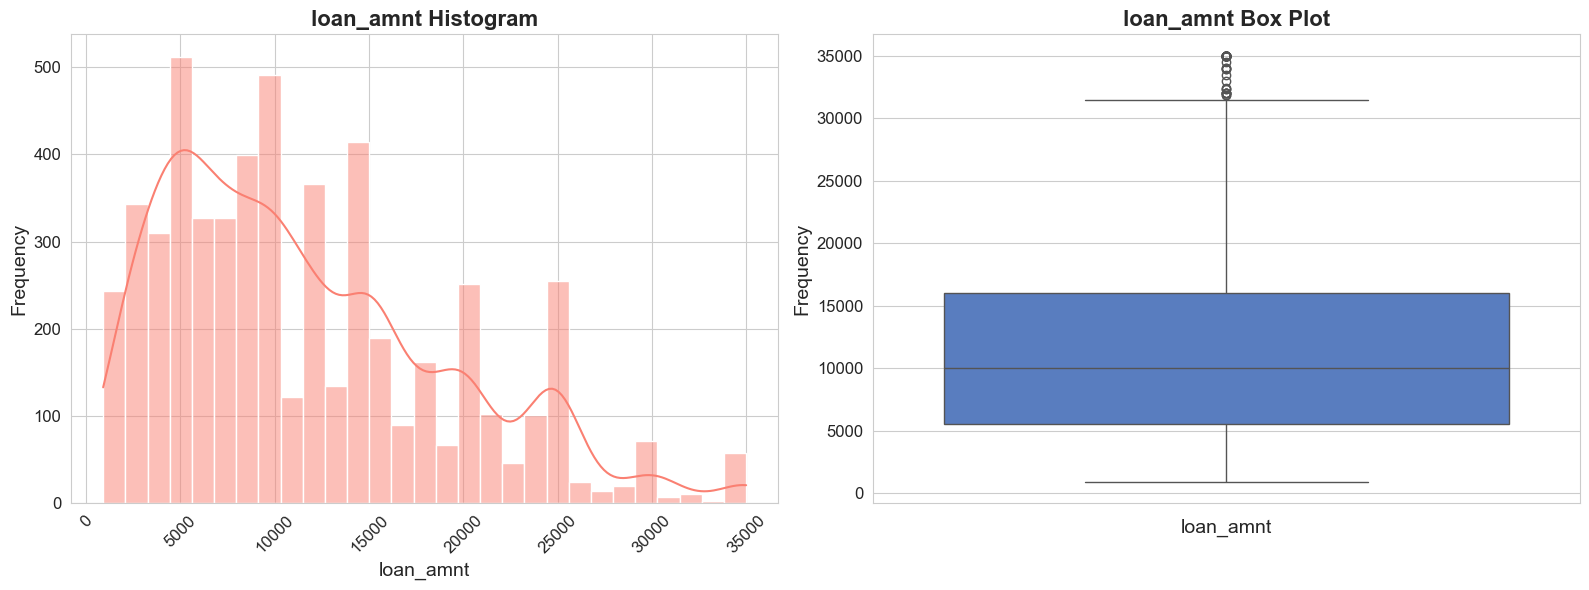

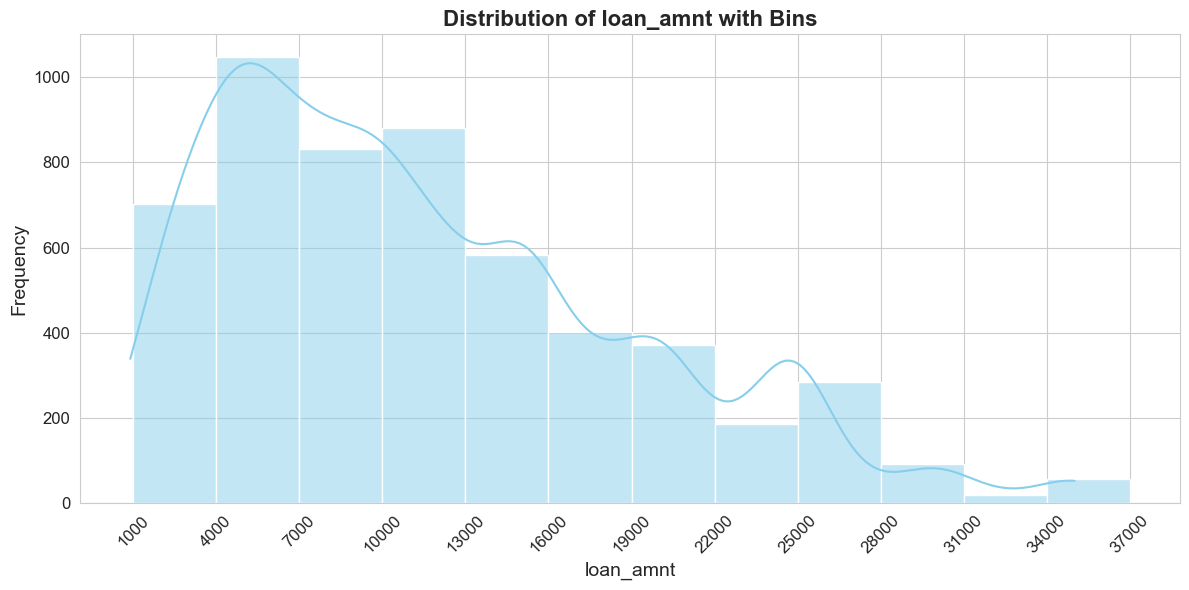

In [73]:
univariate_analysis = UnivariateAnalysis(df_charged_off, 'loan_amnt')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(1000, 38000, 3000))

Initiating detailed analysis of int_rate...

Statistical summary for int_rate:
count    5459.000000
mean       13.734362
std         3.611106
min         5.420000
25%        11.140000
50%        13.490000
75%        16.320000
max        24.400000
Name: int_rate, dtype: float64

The mode of int_rate is: 11.49



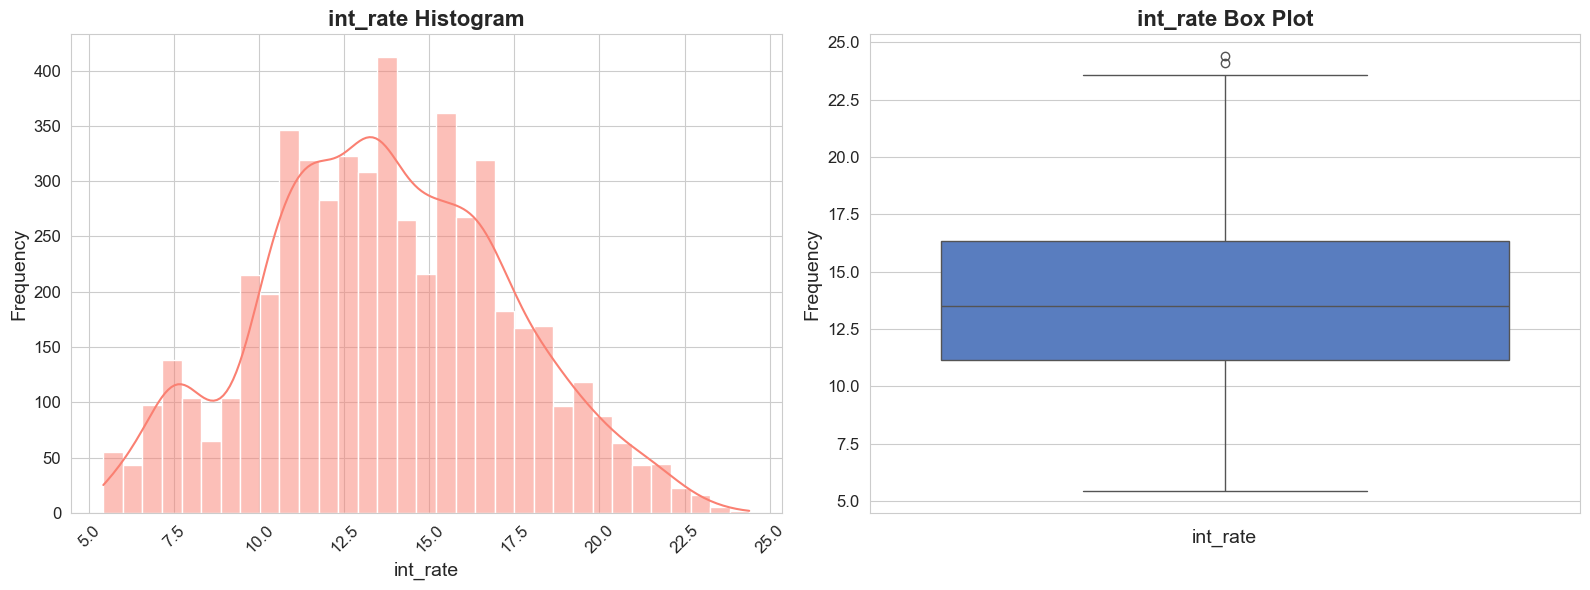

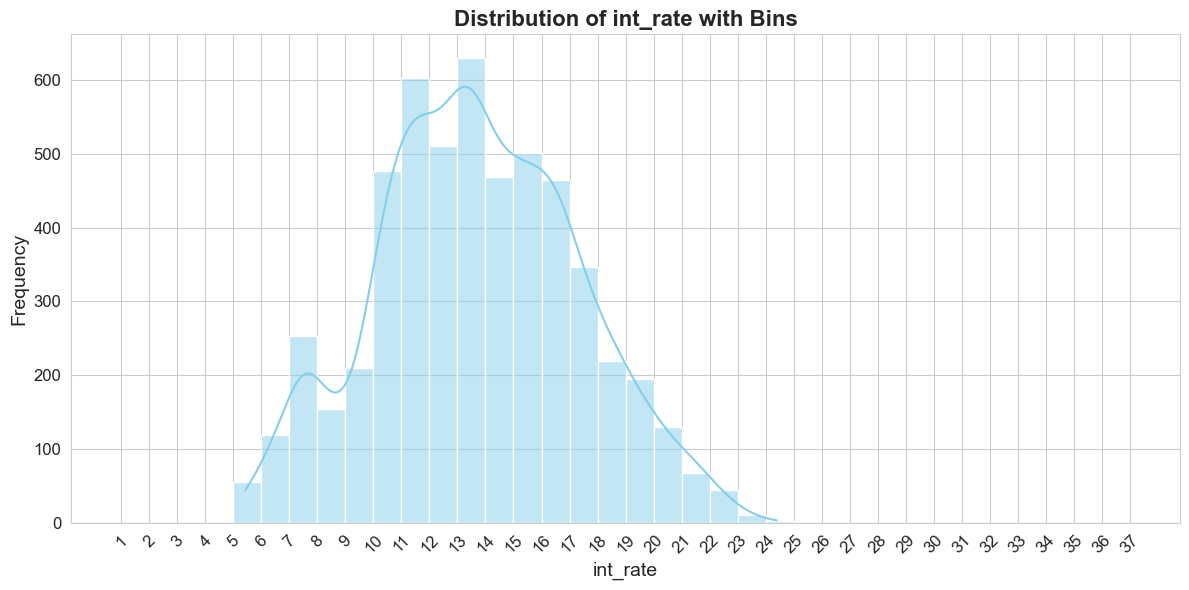

In [74]:
univariate_analysis = UnivariateAnalysis(df_charged_off, 'int_rate')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(1, 38, 1))

Initiating detailed analysis of annual_inc...

Statistical summary for annual_inc:
count      5459.000000
mean      58272.646664
std       30395.899329
min        4080.000000
25%       36500.000000
50%       52000.000000
75%       72000.000000
max      187000.000000
Name: annual_inc, dtype: float64

The mode of annual_inc is: 60000.0



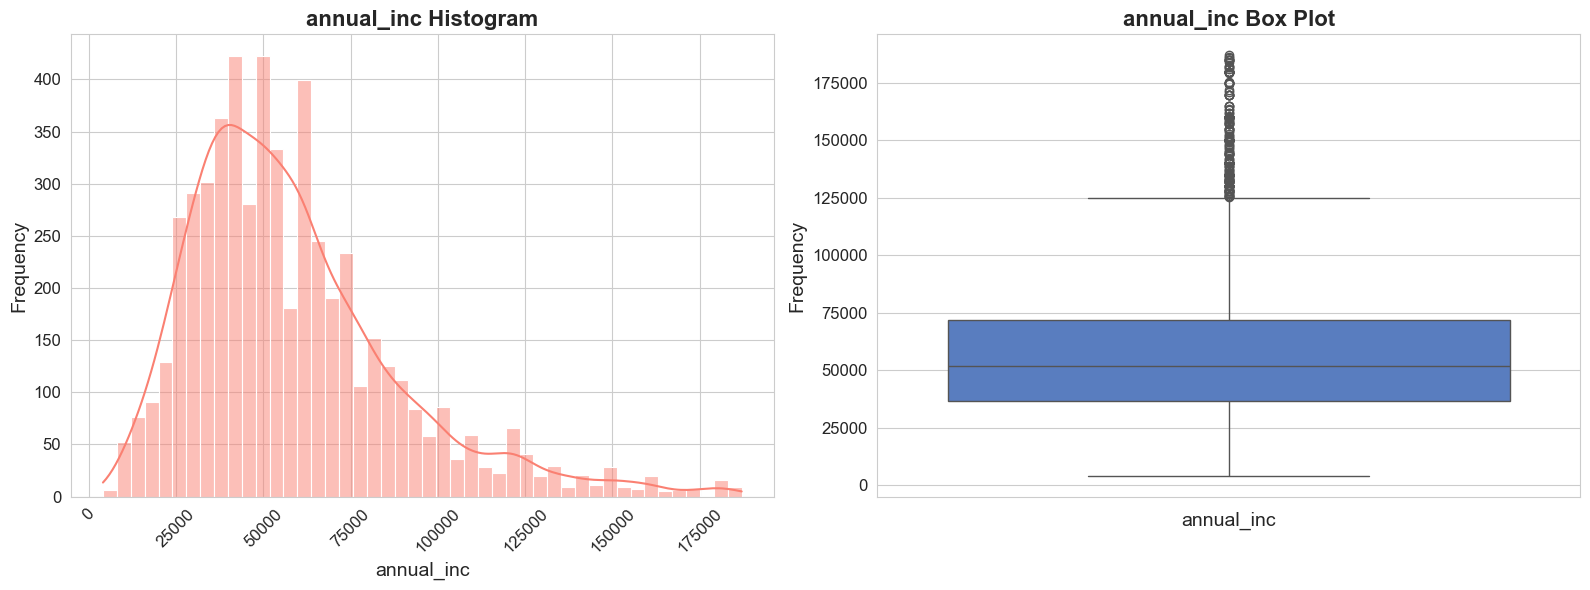

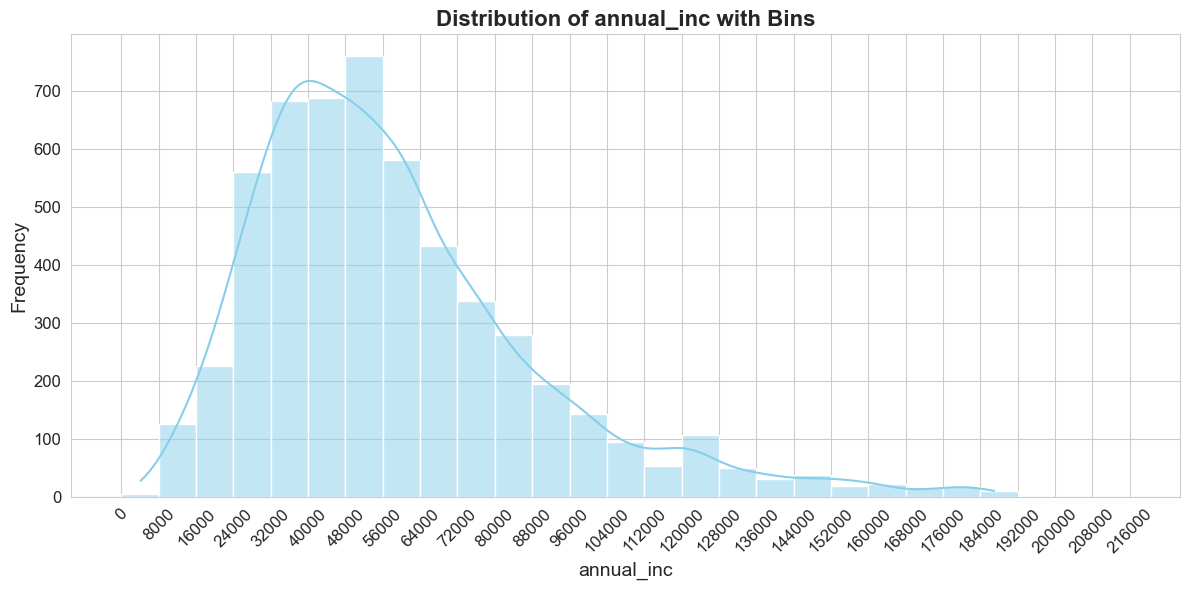

In [75]:
univariate_analysis = UnivariateAnalysis(df_charged_off, 'annual_inc')
univariate_analysis.analyze_without_bins()
univariate_analysis.analyze_with_bins(bin_range=range(0, 220000, 8000))

Initiating detailed analysis of loan_amnt_b...

Statistical summary for loan_amnt_b:
count           5380
unique             6
top       5000-10000
freq            1631
Name: loan_amnt_b, dtype: object

The mode of loan_amnt_b is: 5000-10000



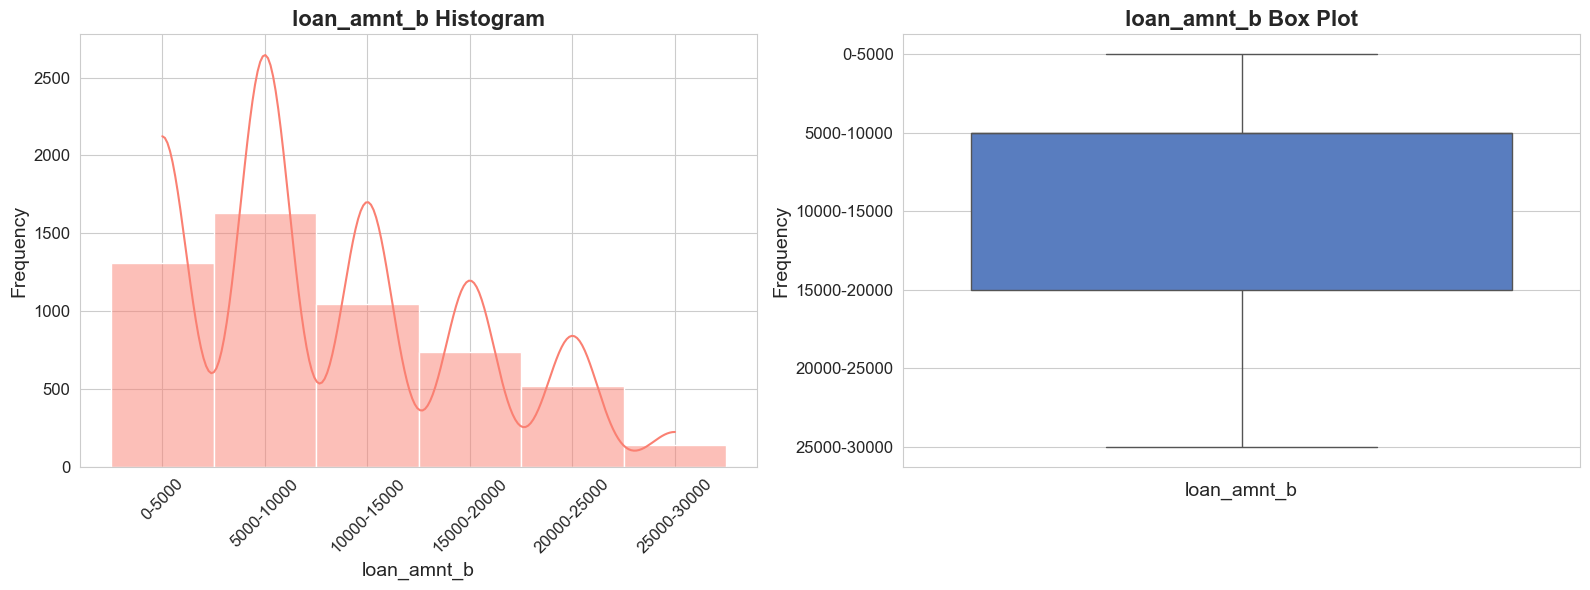

Initiating detailed analysis of grade...

Statistical summary for grade:
count     5459
unique       7
top          B
freq      1396
Name: grade, dtype: object

The mode of grade is: B



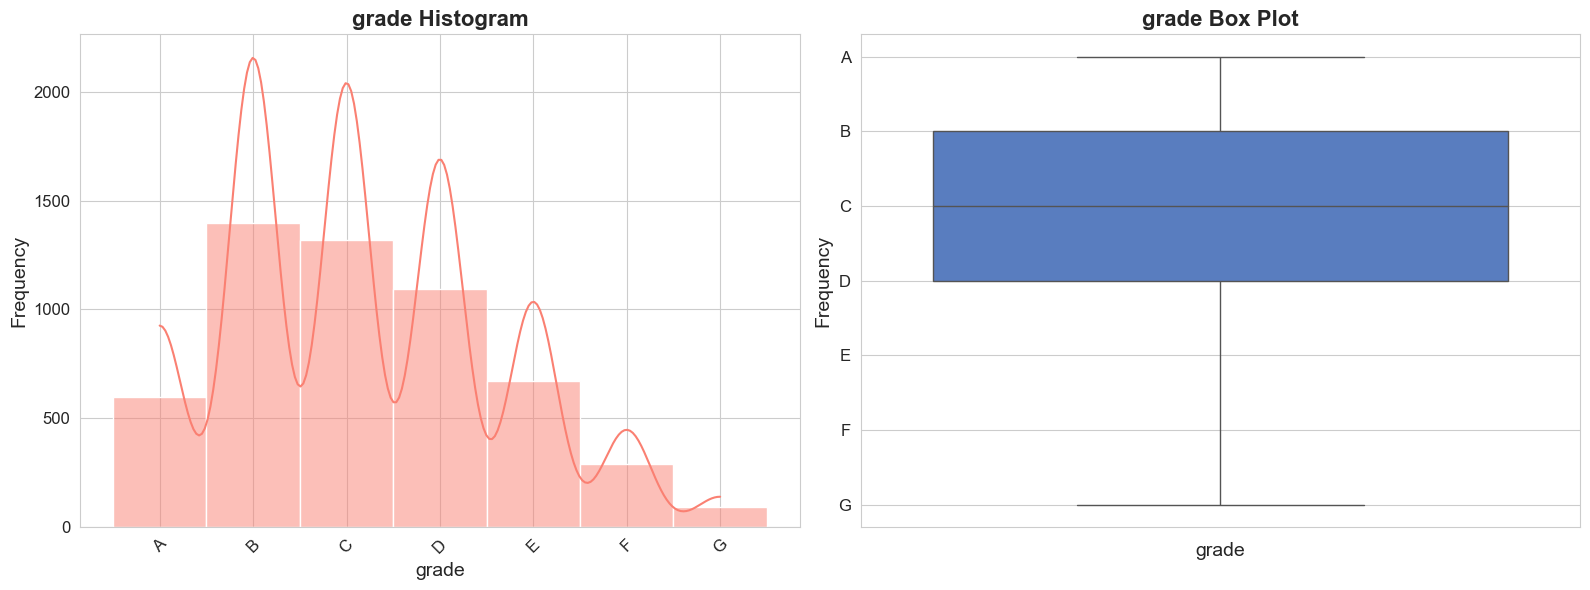

Initiating detailed analysis of emp_length...

Statistical summary for emp_length:
count     5459
unique      11
top        10 
freq      1487
Name: emp_length, dtype: object

The mode of emp_length is: 10 



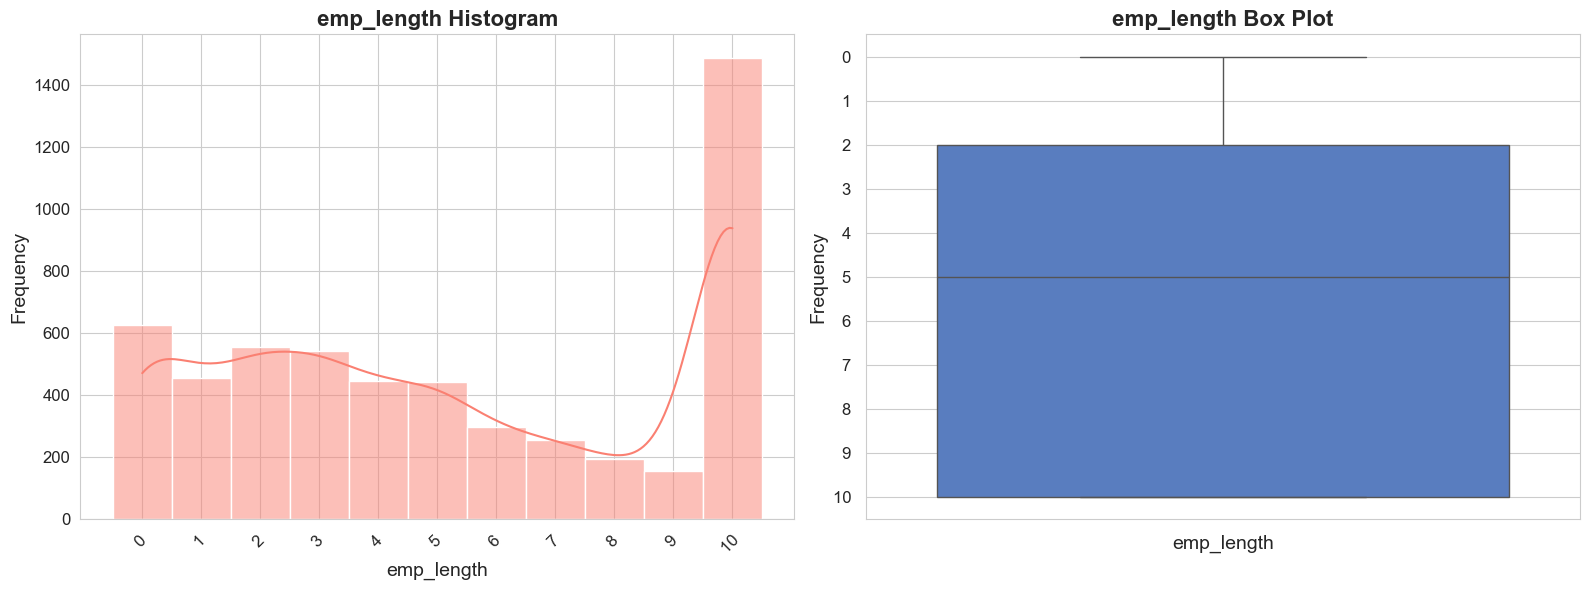

Initiating detailed analysis of verification_status...

Statistical summary for verification_status:
count             5459
unique               3
top       Not Verified
freq              2121
Name: verification_status, dtype: object

The mode of verification_status is: Not Verified



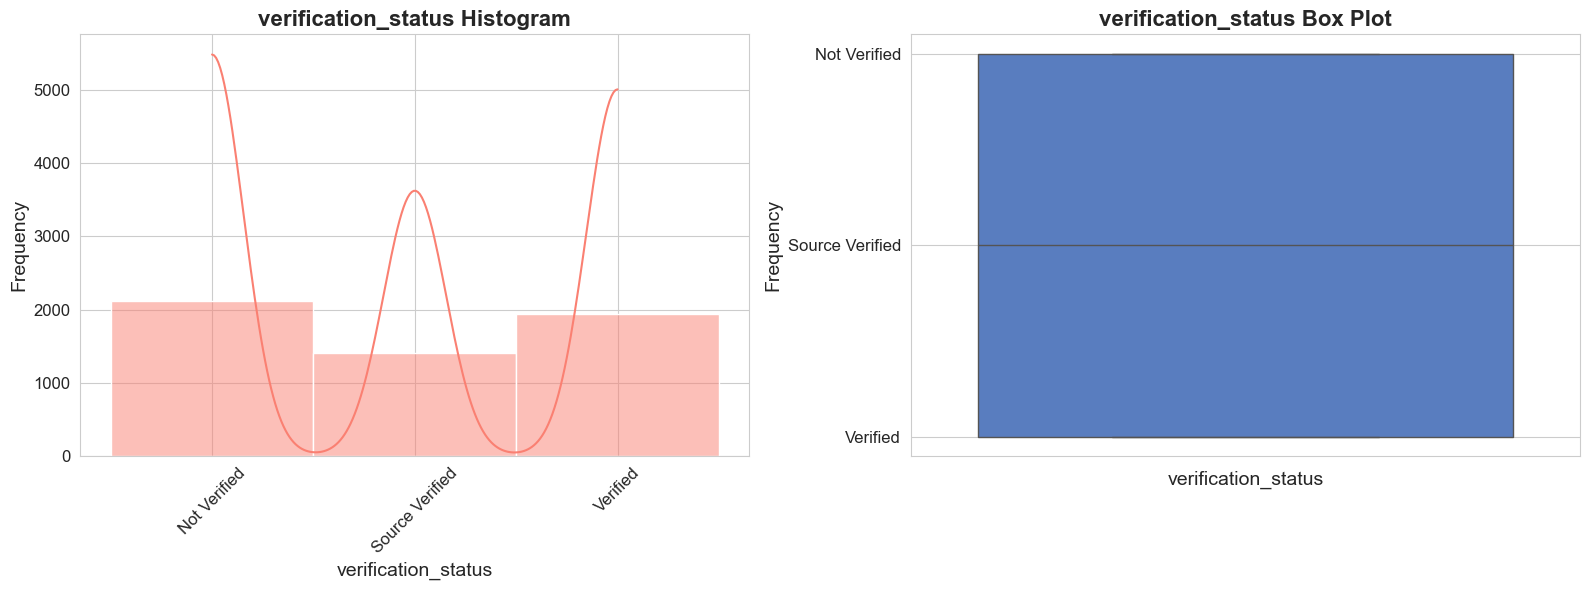

Initiating detailed analysis of home_ownership...

Statistical summary for home_ownership:
count     5459
unique       4
top       RENT
freq      2786
Name: home_ownership, dtype: object

The mode of home_ownership is: RENT



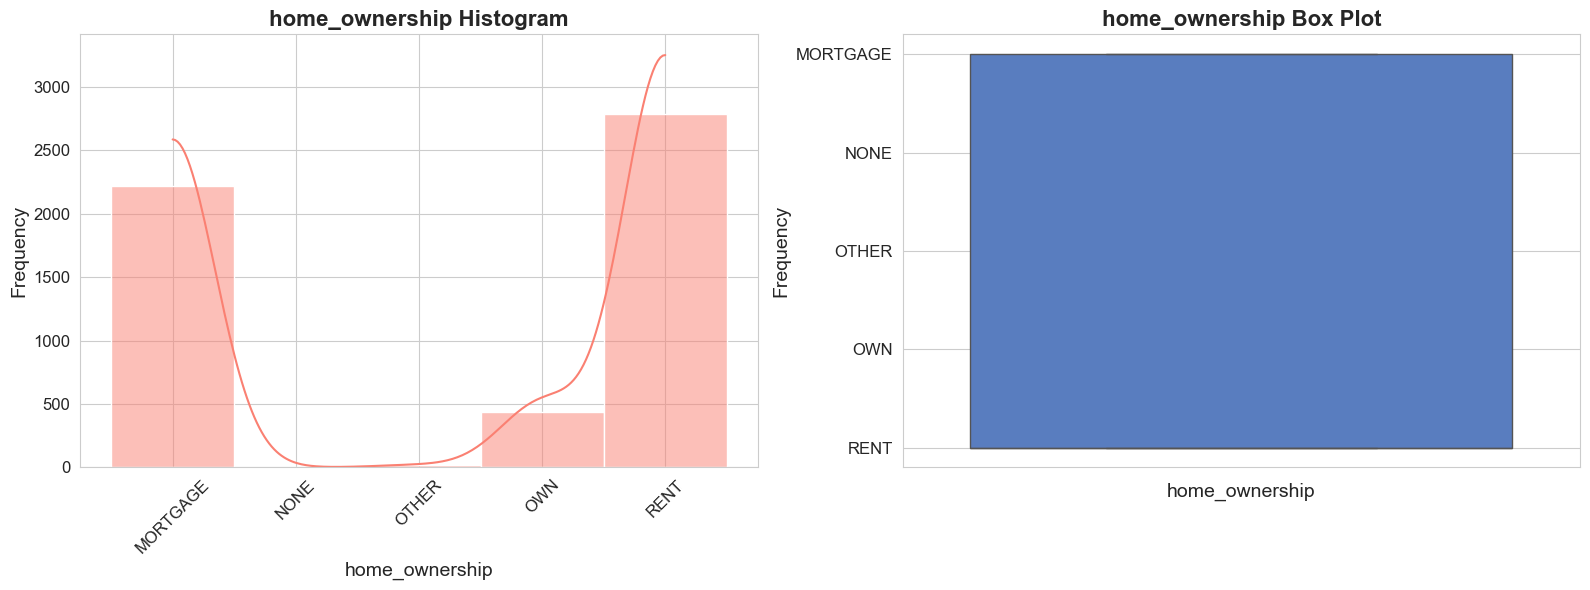

In [76]:
cat_columns = ['loan_amnt_b', 'grade', 'emp_length','verification_status', 'home_ownership']
for category in cat_columns:
    univariate_analysis = UnivariateAnalysis(df_charged_off, category)
    univariate_analysis.analyze_without_bins()

# Bivariate Exploration

In [77]:
# A class for performing bivariate analysis on a DataFrame.

class BivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    # Generates a scatter plot for two specified columns in a DataFrame.
    def scatter_plot(self, x_column, y_column, marker_size=10, alpha=0.2, color='orange'):

        sns.set(style="whitegrid")
        plt.figure(figsize=(7, 5))
        sns.scatterplot(data=self.dataframe, x=x_column, y=y_column, s=marker_size, alpha=alpha, color=color)

        # Set plot title and labels
        plt.title(f'Scatter Plot: {x_column} vs {y_column}', fontsize=13)
        plt.xlabel(x_column, fontsize=12)
        plt.ylabel(y_column, fontsize=12)

        plt.tight_layout()
        plt.show()

    # Generates a boxplot for a categorical column against a numerical column for bivariate analysis.
    def boxplot(self, categorical_column, numerical_column, palette='pastel'):

        sns.set(style="whitegrid")
        plt.figure(figsize=(7, 5))
        sns.boxplot(data=self.dataframe, x=categorical_column, y=numerical_column, palette=palette)

        # Set plot title and labels
        plt.title(f'Boxplot: {categorical_column} vs {numerical_column}', fontsize=13)
        plt.xlabel(categorical_column, fontsize=12)
        plt.ylabel(numerical_column, fontsize=12)

        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

### Bivariate Analysis - Numerical vs Numerical

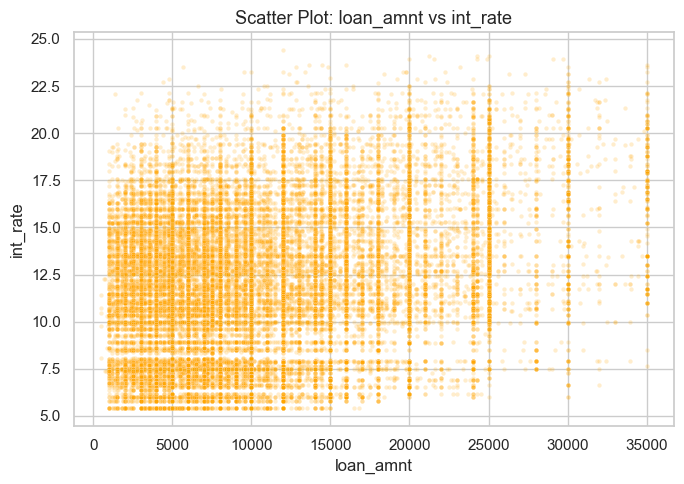

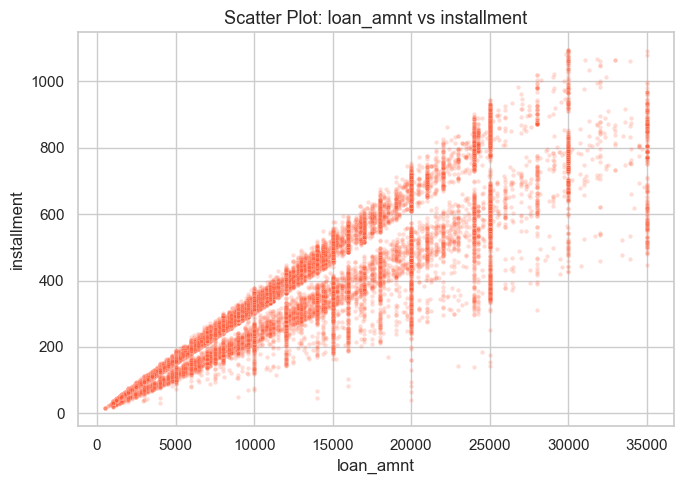

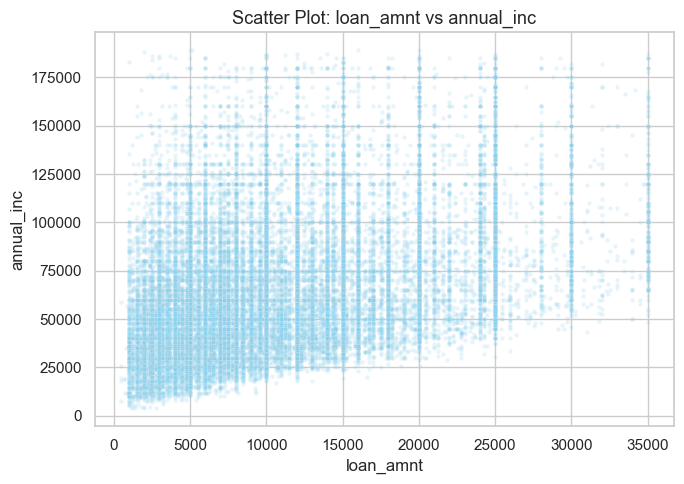

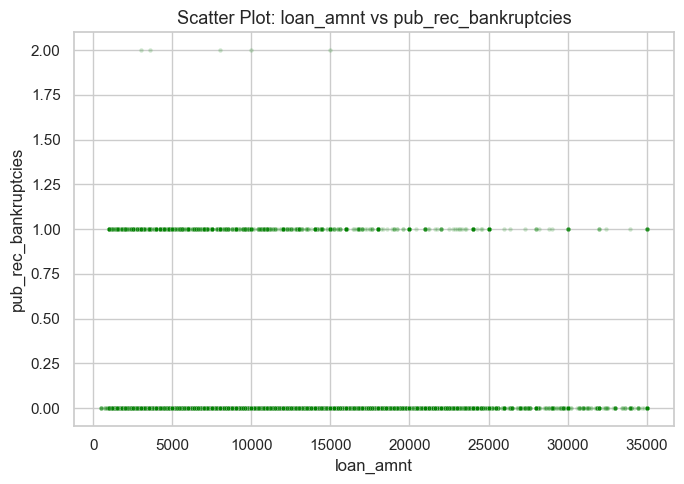

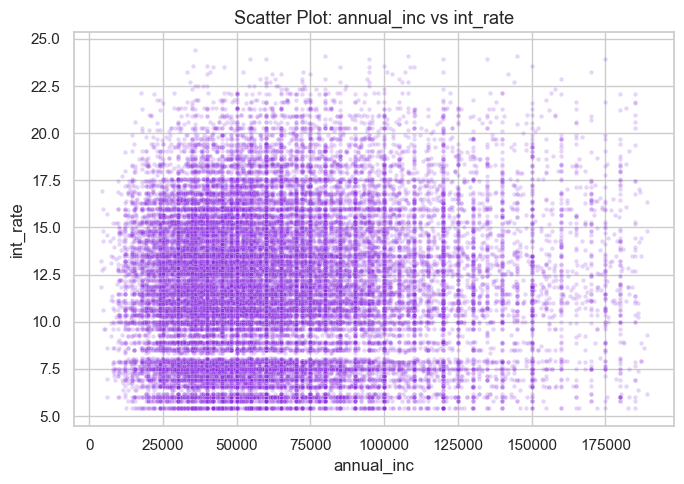

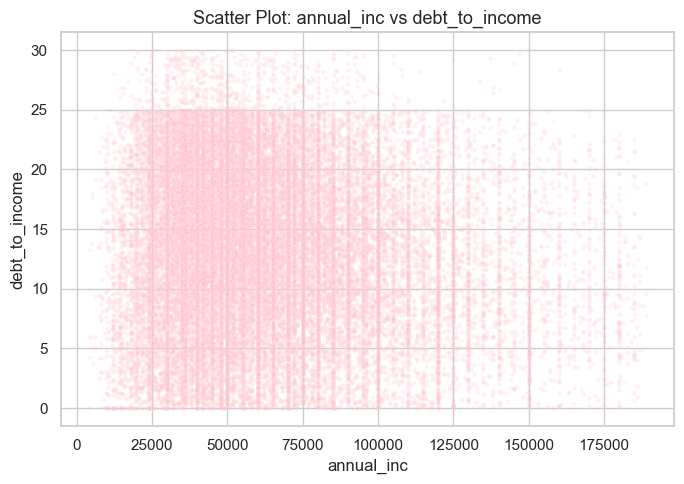

In [78]:
bivariate_analysis = BivariateAnalysis(df_clean)

bivariate_analysis.scatter_plot('loan_amnt', 'int_rate', color='orange')
bivariate_analysis.scatter_plot('loan_amnt', 'installment', color='#FF5733')
bivariate_analysis.scatter_plot('loan_amnt', 'annual_inc', color='skyblue')
bivariate_analysis.scatter_plot('loan_amnt', 'pub_rec_bankruptcies', color='green')
bivariate_analysis.scatter_plot('annual_inc', 'int_rate', color='#8A2BE2')
bivariate_analysis.scatter_plot('annual_inc', 'debt_to_income', color='pink')

### Bivariate Analysis - Categorical vs Numerical

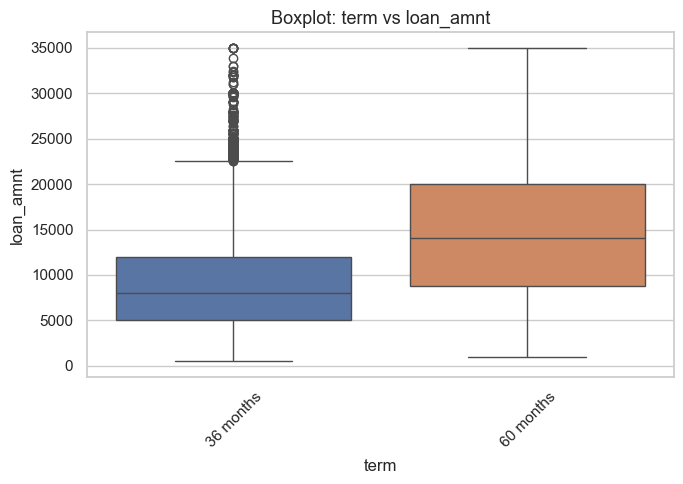

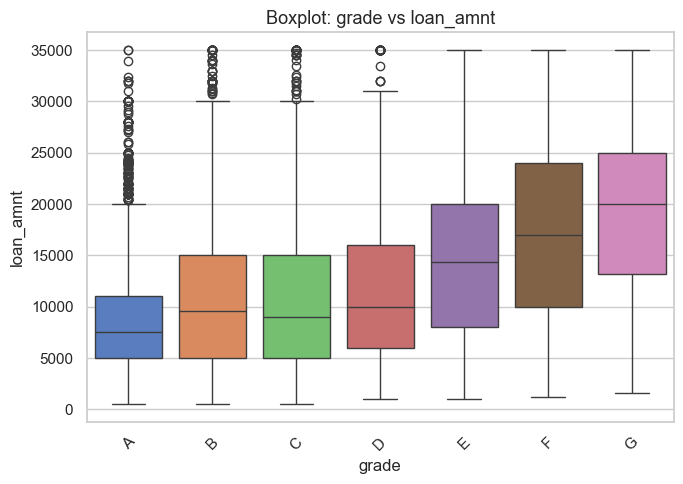

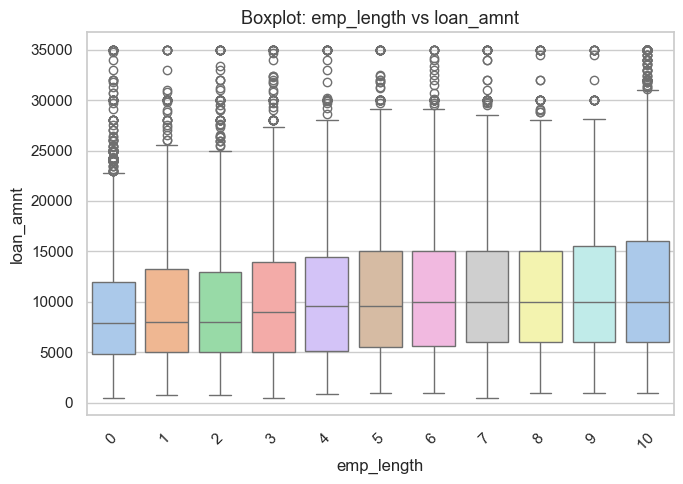

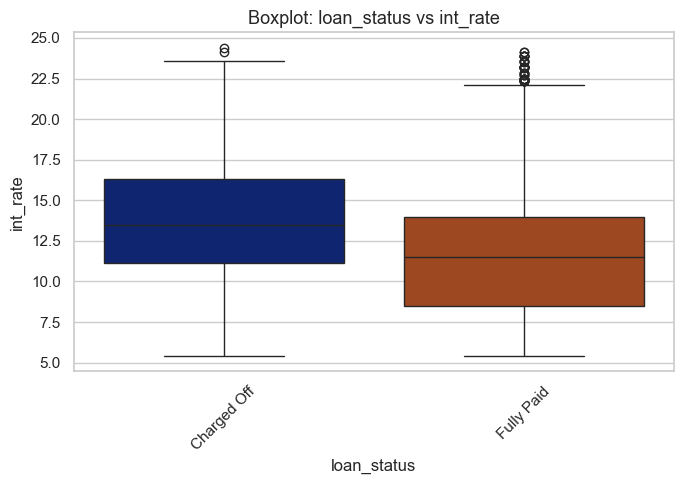

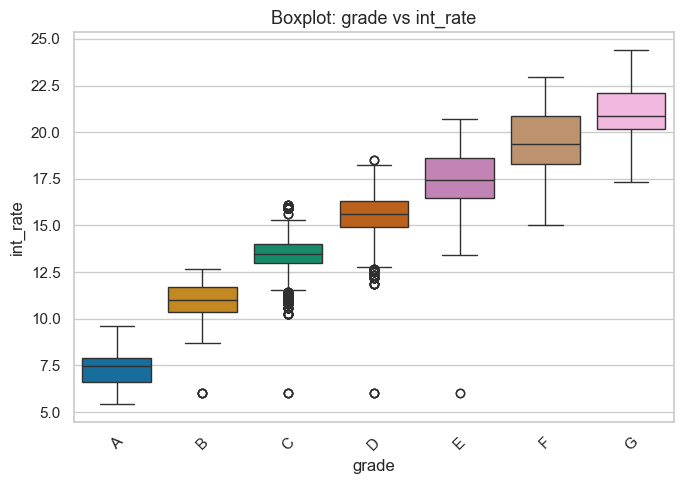

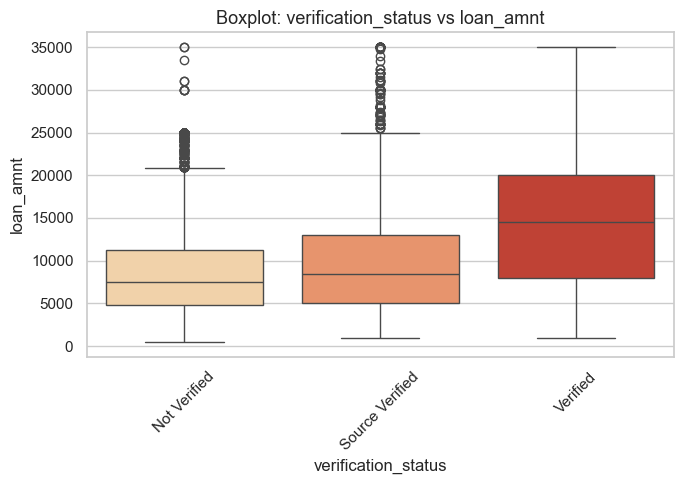

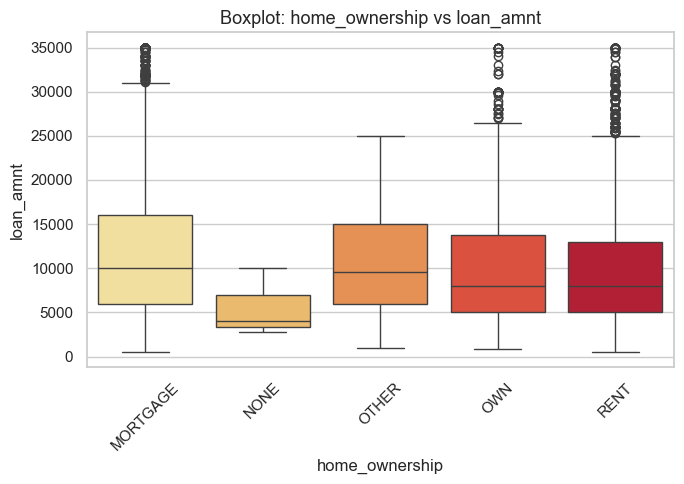

In [79]:
bivariate_analysis = BivariateAnalysis(df_clean)

bivariate_analysis.boxplot('term', 'loan_amnt', palette='deep')
bivariate_analysis.boxplot('grade', 'loan_amnt', palette='muted')
bivariate_analysis.boxplot('emp_length', 'loan_amnt', palette='pastel')
bivariate_analysis.boxplot('loan_status', 'int_rate', palette='dark')
bivariate_analysis.boxplot('grade', 'int_rate', palette='colorblind')
bivariate_analysis.boxplot('verification_status', 'loan_amnt', palette='OrRd')
bivariate_analysis.boxplot('home_ownership', 'loan_amnt', palette='YlOrRd')

Here are the observations derived from the above analysis:


## Multivariate Analysis

In [80]:
# A class for performing multivariate analysis on a DataFrame.
class MultivariateAnalysis:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    # Generates a heatmap for visualizing the correlation matrix of numerical columns in the DataFrame. 
    def heatmap(self, cmap='coolwarm'):
        sns.set(style="white")
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.dataframe.corr(), cmap=cmap, annot=True, fmt=".2f", linewidths=0.5)
        plt.title('Correlation Matrix Heatmap', fontsize=16)
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()


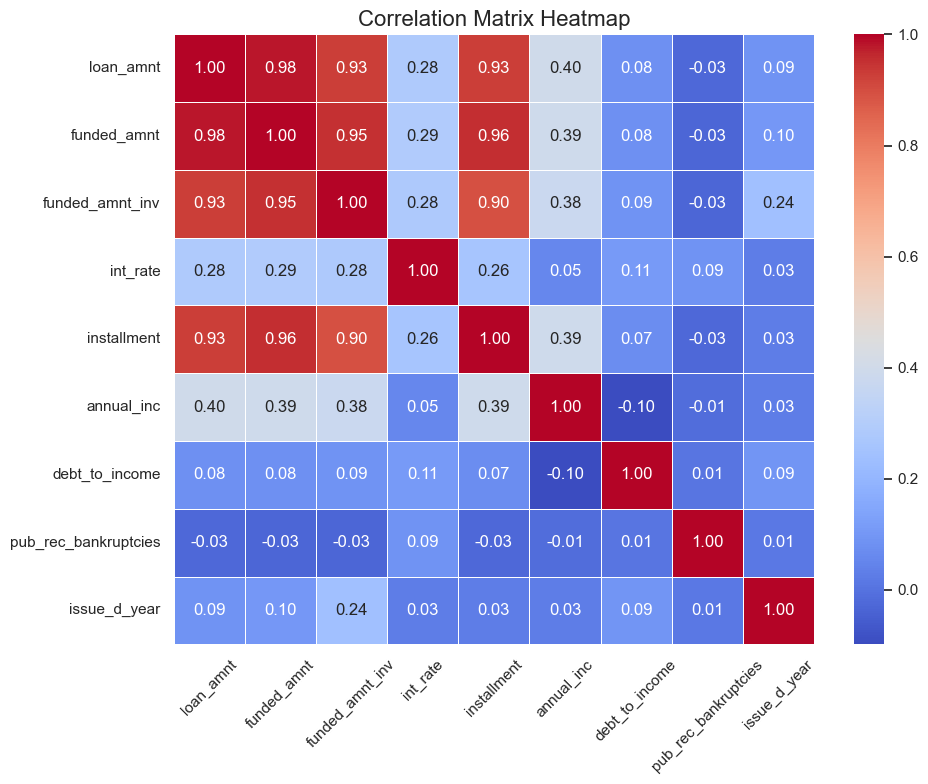

In [81]:
# Generating a heatmap to visualize the correlation matrix of numerical columns in the DataFrame
df_heatmap = df_clean[numerical_columns]
multivariate_analysis = MultivariateAnalysis(df_heatmap)
multivariate_analysis.heatmap()